# Statistical learning for healthcare data project 2023/2024
## Project 1 – Suspected Pneumonia
### Group:
- Francesco Benedetto
- Carlotta Pagani
- Riccardo Sena

## Introduction
The Successful Clinical Response in Pneumonia Therapy (SCRIPT) CarpeDiem Dataset features 12,495 patient-ICU-days from 585 patients enrolled in the SCRIPT study between June 2018 and March 2022, all of whom were critically ill patients on mechanical ventilation suspected of having pneumonia who underwent a bronchoalveolar lavage as part of routine clinical care. Each patient has demographics, pneumonia episode information as adjudicated by a panel of critical care physicians, outcomes, and 44 clinical parameters for which data are present including vital signs, laboratory parameters, and mechanical support devices. This dataset combines expert clinician adjudication with per-day granular information to provide a unique tool to examine the clinical courses of critically ill patients with pneumonia.



### Objectives
- develop a model to predict patient mortality
- how to use the 'has_bal' variable in the model



### Features Overview
In this section, we will describe each feature provided by the dataset, organizing them into macrocategories.
The target variable is highlighted in green. 

#### Indexing
Each patient is identified by an ID number and a pair of values (ICU_stay, ICU_day). This pair indicates the specific day of a particular ICU stay, noting that a patient can return to the ICU multiple times.
| #   | Feature                   | Description                                                   |
|-----|---------------------------|---------------------------------------------------------------|
| 1   | Patient_id/ICU_stay/ICU_day| Patient_id/ICU_stay/ICU_day                                   |
| 2   | Patient_id                | Anonymized patient study ID                                   |

#### Demographics and admission status
| #   | Feature                    | Description                                                                                                                                                                                                    |
|-----|----------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| 3   | External_transfer_flag     | 0/1 flag set if the patient was transferred from an external facility into an NM facility for this hospitalization. [0 is False, 1 is True]                                                                    |
| 4   | Admission_source_name      | Where the patient came from before being admitted for this hospitalization (e.g., From Home/Work).  This is pulled from EHR, but can be NULL if not documented.                                                |
| 5   | Discharge_disposition      | Disposition of where they were discharged to, as recorded in EHR                                                                                                                                               |
| <tr><td style="background-color: green">6</td><td style="background-color: green">Binary_outcome</td><td style="background-color: green">0/1 flag of whether the patient had a good (home, rehab, SNF, LTACH - 0) or bad (died or categorized as died, hospice - 1) outcome this admission.</td></tr> |
| 7   | Global_cause_failure       | Clinician adjudication of patient's entire hospitalization outcome, if felt to be unsuccessful treatment of pneumonia                                                                                          |
| 8   | Patient_category           | What category of pneumonia clinician adjudications felt the patient belonged to, (Non-Pneumonia Control, COVID-19, Other pneumonia, Other viral pneumonia), see manuscript for additional adjudication details |
| 9   | COVID_status               | True/false flag of whether patient had COVID                                                                                                                                                                   |
| 10  | Age                        | Age, except those >=89 years old are aggregated into a group per Safe Harbor deidentification guidelines; this group is  labeled 91                                                                            |
| 11  | Ethnicity                  | Ethnicity                                                                                                                                                                                                      |
| 12  | Gender                     | Gender                                                                                                                                                                                                         |
| 13  | Race                       | Race; groups with fewer than five individuals were censored to ‘Unknown or Not Reported’ to protect patient anonymity.                                                                                         |
| 14  | Smoking_status             | Smoking status                                                                                                                                                                                                 |
| 15  | BMI                        | Body mass index [kg/m^2]                                                                                                                                                                                       |
| 16  | Admit_SOFA_score           | Sequential Organ Failure Assessment [SOFA] score using worst values in first two days                                                                                                                          |
| 17  | Admit_APS_score            | Acute physiology score [APS] score using worse values in first two days                                                                                                                                        |
| 18  | Cumulative_ICU_days        | Total number of days that the patient spent in the ICU                                                                                                                                                         |
| 19  | Number_of_ICU_stays        | Number of ICU stays                                                                              
| 20  | Cumulative_intubation_days | Total number of days intubated during hospitalization                                                                                                                                                          |

#### Per-day Clinical Parameters
| #   | Feature                   | Description                                                                                           |
|-----|---------------------------|-------------------------------------------------------------------------------------------------------|
| 21  | ICU_stay                  | Which ICU stay this is (a patient may have multiple ICU stays in one hospitalization)                  |
| 22  | ICU_day                   | What day of the current ICU stay this is (initial day is day 1, with next day starting at 12:00 a.m.)  |
| 23  | SOFA_score                | Sequential Organ Failure Assessment (SOFA) score                                                      |
| 24  | ECMO_flag                 | 0/1 flag whether the patient was on ECMO this day [0 is False, 1 is True]                             |
| 25  | Intubation_flag           | 0/1 flag whether the patient was intubated this day [0 is False, 1 is True]                           |
| 26  | Tracheostomy_flag         | 0/1 flag of whether patient had tracheostomy [0 is False, 1 is True]                                  |
| 27  | Hemodialysis_flag         | 0/1 flag if patient received dialysis on a given day [0 is False, 1 is True]                          |
| 28  | CRRT_flag                 | 0/1 flag if patient received continuous renal replacement therapy this day [0 is False, 1 is True]    |
| 29  | Temperature               | Mean body temperature [degrees Fahrenheit]                                                            |
| 30  | Heart_rate                | Mean heart rate                                                                                       |
| 31  | Systolic_blood_pressure   | Mean systolic blood pressure [mmHg]                                                                   |
| 32  | Diastolic_blood_pressure  | Mean diastolic blood pressure [mmHg]                                                                  |
| 33  | Mean_arterial_pressure    | Mean arterial pressure [mmHg]                                                                         |
| 34  | Norepinephrine_flag       | 0/1 flag whether the patient was receiving norepinephrine  [0 is False, 1 is True]                    |
| 35  | Norepinephrine_rate       | Highest norepinephrine rate [mcg/kg/min]                                                              |
| 36  | Respiratory_rate          | Mean respiratory rate                                                                                 |
| 37  | Oxygen_saturation         | Mean oxygen saturation [%]                                                                            |
| 38  | Urine_output              | Urine output [cc]                                                                                     |
| 39  | GCS_eye_opening           | Minimum Glascow Coma Scale eye-opening score                                                          |
| 40  | GCS_motor_response        | Minimum Glascow Coma Scale motor response score                                                       |
| 41  | GCS_verbal_response       | Minimum Glascow Coma Scale verbal response score                                                      |
| 42  | RASS_score                | Median Richmond Agitation Sedation Scale score                                                        |
| 43  | PEEP                      | Mean positive end-expiratory pressure [cm H2O]                                                        |
| 44  | FiO2                      | Mean fraction inspired oxygen [%]                                                                     |
| 45  | Plateau_Pressure          | Mean plateau pressure [cm H2O]                                                                        |
| 46  | Lung_Compliance           | Mean lung compliance [L/cm H2O]                                                                       |
| 47  | PEEP_changes              | Number of changes to PEEP on the ventilator                                                           |
| 48  | Respiratory_rate_changes  | Number of changes to respiratory rate on the ventilator                                               |
| 49  | FiO2_changes              | Number of changes to FiO2 on the ventilator                                                           |
| 50  | ABG_pH                    | Arterial blood gas pH                                                                                 |
| 51  | ABG_PaCO2                 | Arterial blood gas PaCO2 [mm Hg]                                                                      |
| 52  | ABG_PaO2                  | Arterial blood gas PaO2 [mm Hg]                                                                       |
| 53  | PaO2FIO2_ratio            | Worst PaO2 / FiO2                                                                                     |
| 54  | WBC_count                 | Mean white blood cell count [K/UL]                                                                    |
| 55  | Lymphocytes               | Mean absolute lymphocyte count [K/UL]                                                                 |
| 56  | Neutrophils               | Mean absolute neutrophil count [K/UL]                                                                 |
| 57  | Hemoglobin                | Mean hemoglobin [g/dL]                                                                                |
| 58  | Platelets                 | Lowest platelet value [K/UL]                                                                          |
| 59  | Bicarbonate               | Mean bicarbonate [mmol/L]                                                                             |
| 60  | Creatinine                | Highest creatinine [mg/dL]                                                                            |
| 61  | Albumin                   | Mean albumin [g/dL]                                                                                   |
| 62  | Bilirubin                 | Highest bilirubin lab result (part of SOFA score) [mg/dL]                                             |
| 63  | CRP                       | Mean CRP [mg/L]                                                                                       |
| 64  | D_dimer                   | Mean D-Dimer [ng/mL D-DU]                                                                             |
| 65  | Ferritin                  | Mean ferritin [ng/mL]                                                                                 |
| 66  | LDH                       | Mean LDH [units/L]                                                                                    |
| 67  | Lactic_acid               | Mean lactic acid [mmol/L]                                                                             |
| 68  | Procalcitonin             | Mean procalcitonin [ng/mL]                                                                            |

#### BAL and pneumonia episode information
| #   | Feature          | Description                                                                                                                                                                                                                                                                                                                          |
|-----|------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| 69  | has_bal          | True/false of whether patient had a BAL this day                                                                                                                                                                                                                                                                                     |
| 70  | Episode_category | What type of pneumonia the patient had (CAP - community acquired pneumonia, HAP - hospital acquired pneumonia, VAP - ventilator associated pneumonia, Non pneumonia control) for the episode that started that day; note that adjudication process began with study enrollment date, which may some time into the actual ICU course. |
| 71  | Episode_etiology | What type of episode was defined (bacterial, viral, both bacterial and viral, or culture-negative)                                                                                                                                                                                                                                   |
| 72  | Episode_is_cured | Whether clinician adjudication panel felt the pneumonia episode was cured                                                                                                                                                                                                                                                            |
| 73  | Episode_duration | How many days the pneumonia episode lasted, only calculated for bacterial or viral/bacterial episodes; viral-only episodes have duration NA                                                                                                                                                                                          |
                                                                                          |


# Development Process

### Importing libraries and loading dataset
In this section, the main libraries used for data analysis and visualization are imported, as well as for splitting data into training and test sets. Additionally, warning filters are configured to ignore any library warnings.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from sklearn.model_selection import train_test_split
from datetime import datetime, timedelta
import warnings
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from collections import Counter
from sklearn.utils import class_weight
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import DBSCAN
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn import metrics 
from sklearn.metrics import recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.utils import class_weight
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

# Set seed for reproducibility of random numbers
np.random.seed(12345)

warnings.filterwarnings('ignore')

In [2]:
# Read the dataset
df=pd.read_csv('CarpeDiem_dataset.csv')
df_original = df.copy()
df_original

,Patient_id/ICU_stay/ICU_day,Patient_id,External_transfer_flag,Admission_source_name,Discharge_disposition,Binary_outcome,Global_cause_failure,Patient_category,COVID_status,Age,...,D_dimer,Ferritin,LDH,Lactic_acid,Procalcitonin,has_bal,Episode_category,Episode_etiology,Episode_is_cured,Episode_duration
0,43/1/1,43,0,From Home/Work,Rehab,0,NaN,COVID-19,True,72,...,502.0,1169.9,315.0,0.90,0.208,True,CAP,Viral,Not cured,NaN
1,43/1/2,43,0,From Home/Work,Rehab,0,NaN,COVID-19,True,72,...,487.0,1307.3,NaN,NaN,0.387,False,NaN,NaN,NaN,NaN
2,43/1/3,43,0,From Home/Work,Rehab,0,NaN,COVID-19,True,72,...,593.0,1501.4,NaN,0.90,0.459,False,NaN,NaN,NaN,NaN
3,43/1/4,43,0,From Home/Work,Rehab,0,NaN,COVID-19,True,72,...,507.0,1617.1,NaN,0.80,0.471,False,NaN,NaN,NaN,NaN
4,43/1/5,43,0,From Home/Work,Rehab,0,NaN,COVID-19,True,72,...,632.0,1548.2,NaN,NaN,0.717,False,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12490,9997/1/25,9997,0,From Home/Work,Died,1,NaN,Non-Pneumonia Control,False,42,...,NaN,NaN,259.0,2.25,NaN,False,NaN,NaN,NaN,NaN
12491,9997/1/26,9997,0,From Home/Work,Died,1,NaN,Non-Pneumonia Control,False,42,...,NaN,NaN,282.0,2.45,NaN,False,NaN,NaN,NaN,NaN
12492,9997/1/27,9997,0,From Home/Work,Died,1,NaN,Non-Pneumonia Control,False,42,...,NaN,NaN,241.0,4.00,NaN,False,NaN,NaN,NaN,NaN
12493,9997/1/28,9997,0,From Home/Work,Died,1,NaN,Non-Pneumonia Control,False,42,...,NaN,NaN,222.0,2.90,NaN,False,NaN,NaN,NaN,NaN


## Dataset inspection
Datatypes, duplicates and unuseful variables. 

In [3]:
# Showing the dataset
df

,Patient_id/ICU_stay/ICU_day,Patient_id,External_transfer_flag,Admission_source_name,Discharge_disposition,Binary_outcome,Global_cause_failure,Patient_category,COVID_status,Age,...,D_dimer,Ferritin,LDH,Lactic_acid,Procalcitonin,has_bal,Episode_category,Episode_etiology,Episode_is_cured,Episode_duration
0,43/1/1,43,0,From Home/Work,Rehab,0,NaN,COVID-19,True,72,...,502.0,1169.9,315.0,0.90,0.208,True,CAP,Viral,Not cured,NaN
1,43/1/2,43,0,From Home/Work,Rehab,0,NaN,COVID-19,True,72,...,487.0,1307.3,NaN,NaN,0.387,False,NaN,NaN,NaN,NaN
2,43/1/3,43,0,From Home/Work,Rehab,0,NaN,COVID-19,True,72,...,593.0,1501.4,NaN,0.90,0.459,False,NaN,NaN,NaN,NaN
3,43/1/4,43,0,From Home/Work,Rehab,0,NaN,COVID-19,True,72,...,507.0,1617.1,NaN,0.80,0.471,False,NaN,NaN,NaN,NaN
4,43/1/5,43,0,From Home/Work,Rehab,0,NaN,COVID-19,True,72,...,632.0,1548.2,NaN,NaN,0.717,False,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12490,9997/1/25,9997,0,From Home/Work,Died,1,NaN,Non-Pneumonia Control,False,42,...,NaN,NaN,259.0,2.25,NaN,False,NaN,NaN,NaN,NaN
12491,9997/1/26,9997,0,From Home/Work,Died,1,NaN,Non-Pneumonia Control,False,42,...,NaN,NaN,282.0,2.45,NaN,False,NaN,NaN,NaN,NaN
12492,9997/1/27,9997,0,From Home/Work,Died,1,NaN,Non-Pneumonia Control,False,42,...,NaN,NaN,241.0,4.00,NaN,False,NaN,NaN,NaN,NaN
12493,9997/1/28,9997,0,From Home/Work,Died,1,NaN,Non-Pneumonia Control,False,42,...,NaN,NaN,222.0,2.90,NaN,False,NaN,NaN,NaN,NaN


In [4]:
print('The initial variables are:', df.columns)

The initial variables are: Index(['Patient_id/ICU_stay/ICU_day', 'Patient_id', 'External_transfer_flag',
       'Admission_source_name', 'Discharge_disposition', 'Binary_outcome',
       'Global_cause_failure', 'Patient_category', 'COVID_status', 'Age',
       'Ethnicity', 'Gender', 'Race', 'Smoking_status', 'BMI',
       'Admit_APS_score', 'Admit_SOFA_score', 'Cumulative_ICU_days',
       'Number_of_ICU_stays', 'Tracheostomy_flag',
       'Cumulative_intubation_days', 'ICU_stay', 'ICU_day', 'SOFA_score',
       'ECMO_flag', 'Intubation_flag', 'Hemodialysis_flag', 'CRRT_flag',
       'Temperature', 'Heart_rate', 'Systolic_blood_pressure',
       'Diastolic_blood_pressure', 'Mean_arterial_pressure',
       'Norepinephrine_rate', 'Norepinephrine_flag', 'Respiratory_rate',
       'Oxygen_saturation', 'Urine_output', 'GCS_eye_opening',
       'GCS_motor_response', 'GCS_verbal_response', 'RASS_score', 'PEEP',
       'FiO2', 'Plateau_Pressure', 'Lung_Compliance', 'PEEP_changes',
       'Resp

In [5]:
print('Dimension of the dataset:', df.shape)
print('The total number of patients is:', (df['Patient_id'].unique()).shape[0])

Dimension of the dataset: (12495, 73)
The total number of patients is: 585


### Datatypes and memory usage
Let's check datatypes and fix them (if possible) to reduce dataset memory usage.

In [6]:
# Memory usage of the dataset before optimization
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12495 entries, 0 to 12494
Data columns (total 73 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Patient_id/ICU_stay/ICU_day  12495 non-null  object 
 1   Patient_id                   12495 non-null  int64  
 2   External_transfer_flag       12495 non-null  int64  
 3   Admission_source_name        12495 non-null  object 
 4   Discharge_disposition        12495 non-null  object 
 5   Binary_outcome               12495 non-null  int64  
 6   Global_cause_failure         5437 non-null   object 
 7   Patient_category             12495 non-null  object 
 8   COVID_status                 12495 non-null  bool   
 9   Age                          12495 non-null  int64  
 10  Ethnicity                    12495 non-null  object 
 11  Gender                       12495 non-null  object 
 12  Race                         12495 non-null  object 
 13  Smoking_status  

In [7]:
# Checking which data types are present in the dataset
print(df.dtypes.value_counts())

float64    43
int64      16
object     12
bool        2
Name: count, dtype: int64


In [8]:
# Checking data types for each column
data_types = pd.DataFrame(df.dtypes, columns=['Data Type'])
data_types

,Data Type
Patient_id/ICU_stay/ICU_day,object
Patient_id,int64
External_transfer_flag,int64
Admission_source_name,object
Discharge_disposition,object
...,...
has_bal,bool
Episode_category,object
Episode_etiology,object
Episode_is_cured,object


#### Data Type Transformation

After analyzing the dataset and the values within each column, it was observed that:

1. Some columns initially stored as `float64` can be transformed into `int64` for better efficiency and memory optimization. These columns primarily represented integer values without the need for floating-point precision.

2. Several columns stored as `int64` were actually boolean flags. These columns are converted to `bool` type to accurately represent their binary nature and reduce memory usage.

3. All columns originally stored as `object` type, which typically include categorical data, have been converted to `category` type. This transformation helps in reducing memory consumption and improves performance for operations involving these columns.

These transformations ensure that the dataset is optimized for both memory usage and computational efficiency, facilitating more effective data analysis and processing.


In [9]:
# In order to convert from float64 into int64, we need to fill the missing values with a number (just temporary)
# Other solution was to use Int64 (that can handle missing values), but has similar memory usage as float64
float_columns = df.select_dtypes(include=['float64']).columns
df[float_columns]=df[float_columns].fillna(-9999)

In [10]:
def convert_dtypes(df):
    # Function to check for non-zero decimals
    def check_for_decimals(col):
        return col.apply(lambda x: x % 1 != 0).any()

    # Convert float64 columns to int64 if they only have decimals equal to .0
    float_columns = df.select_dtypes(include=['float64']).columns
    for col in float_columns:
        if not check_for_decimals(df[col]):
            df[col] = df[col].apply(lambda x: int(x) if not pd.isna(x) else np.nan).astype('int64')

    # Convert columns containing 'flag' in their name to bool
    for col in df.columns:
        if 'flag' in col.lower():
            df[col] = df[col].apply(lambda x: bool(x) if not pd.isna(x) else np.nan).astype('bool')

    # Convert specific column to bool
    df['Binary_outcome'] = df['Binary_outcome'].apply(lambda x: bool(x) if not pd.isna(x) else np.nan).astype('bool')

    # Convert object columns to category
    object_columns = df.select_dtypes(include=['object']).columns
    for col in object_columns:
        df[col] = df[col].astype('category')

    return df



# Apply the convert_dtypes function
df = convert_dtypes(df)

# Back to Nan: sostiution -9999 with NaN
df[float_columns] = df[float_columns].replace(-9999, np.nan)

# Verify the changes
print(df.dtypes.value_counts())
data_types = pd.DataFrame(df.dtypes, columns=['Data Type'])
data_types

float64     41
int64       10
bool        10
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
Name: count, dtype: int64


,Data Type
Patient_id/ICU_stay/ICU_day,category
Patient_id,int64
External_transfer_flag,bool
Admission_source_name,category
Discharge_disposition,category
...,...
has_bal,bool
Episode_category,category
Episode_etiology,category
Episode_is_cured,category


In [11]:
# Memory usage of the dataset after optimization
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12495 entries, 0 to 12494
Data columns (total 73 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Patient_id/ICU_stay/ICU_day  12495 non-null  category
 1   Patient_id                   12495 non-null  int64   
 2   External_transfer_flag       12495 non-null  bool    
 3   Admission_source_name        12495 non-null  category
 4   Discharge_disposition        12495 non-null  category
 5   Binary_outcome               12495 non-null  bool    
 6   Global_cause_failure         5437 non-null   category
 7   Patient_category             12495 non-null  category
 8   COVID_status                 12495 non-null  bool    
 9   Age                          12495 non-null  int64   
 10  Ethnicity                    12495 non-null  category
 11  Gender                       12495 non-null  category
 12  Race                         12495 non-null  category
 13  S

Memory usage of the dataset has more than halved: from 14.1 MB to 6.2 MB

Creating three lists with the names of the numerical, dicrete and categorical vairabes. It may become usefull later. 

In [12]:
numerical = df.select_dtypes(include=['float64', 'int64']).columns
discrete = df.select_dtypes(include=['int64']).columns
categorical = df.select_dtypes(include=['category', 'bool']).columns

### Checking duplicates 
Let's check if any duplicate is present in the dataset

In [13]:
def check_duplicates(df):
    if df.duplicated().sum() == 0:
        print('No duplicates found in the dataset.')
    else:
        print('Duplicates found in the dataset.')
        print('The indexes of the duplicates are:', df[df.duplicated()].index)

# Apply the check_duplicates function
check_duplicates(df)

No duplicates found in the dataset.


### Deleting unuseful variables
In this section we are going to delete some variables which contain redundant ore unesful informations.

Here the list of variables and motivation:

- `Patient_id/ICU_stay/ICU_day` because this variable is already splitted and present in the dataset.
- `Hemodialysis_flag`, since there is a high dominance of the value 1. 
- `Admission_source_name` and `External_transfer_flag` contained overlapped infromation. We are going to obtain new variables from them. 
- `Discharge_disposition` because for our purpose it's sufficient to know if at the end of the ICU stay, the patient has died or not
- `COVID_status` because this information is already present in `Patient_category`
- `Admit_SOFA_score` because this information is already present in the column SOFA_score in the first day of each ICU_stay
- `Cumulative_ICU_days` the same information can be retrieved by using the `ICU_stay`.
- `Cumulative_intubation_days`because the same information will be retrieved by using the `Intubation_flag`
- `Ethnicity` and `Race`  contained an enormous number of missing values (or 'Indetermined') and it is impossibile to make inference on them.
- `Smoking_status`


Let's look at them, one by one. 

#### `Patient_id/ICU_stay/ICU_day`
This variable is already split and present in the dataset.
Dropping it after checking consistency

In [14]:
# Checking consistency for 'Patient_id/ICU_stay/ICU_day' and the variables: 'Patient_id', 'ICU_stay', 'ICU_day'
def check_consistency(df):
    combined = df['Patient_id'].astype(str) + '/' + df['ICU_stay'].astype(str) + '/' + df['ICU_day'].astype(str)
    
    consistent = (combined == df['Patient_id/ICU_stay/ICU_day'].astype(str)).all()
    
    if consistent:
        print('The variable Patient_id/ICU_stay/ICU_day is consistent with Patient_id, ICU_stay and ICU_day.')
    else:
        print('The variable Patient_id/ICU_stay/ICU_day is not consistent with Patient_id, ICU_stay and ICU_day.')

# Apply the check_consistency function
check_consistency(df)

The variable Patient_id/ICU_stay/ICU_day is consistent with Patient_id, ICU_stay and ICU_day.


#### Categorical variables (Hemodialysis_flag removal)
For a better understanding, we visualize the distribution of the categorical variables through a barplot. 
If a category within a categorical variable is over dominant, it is reasonable to remove it from the dataset. 

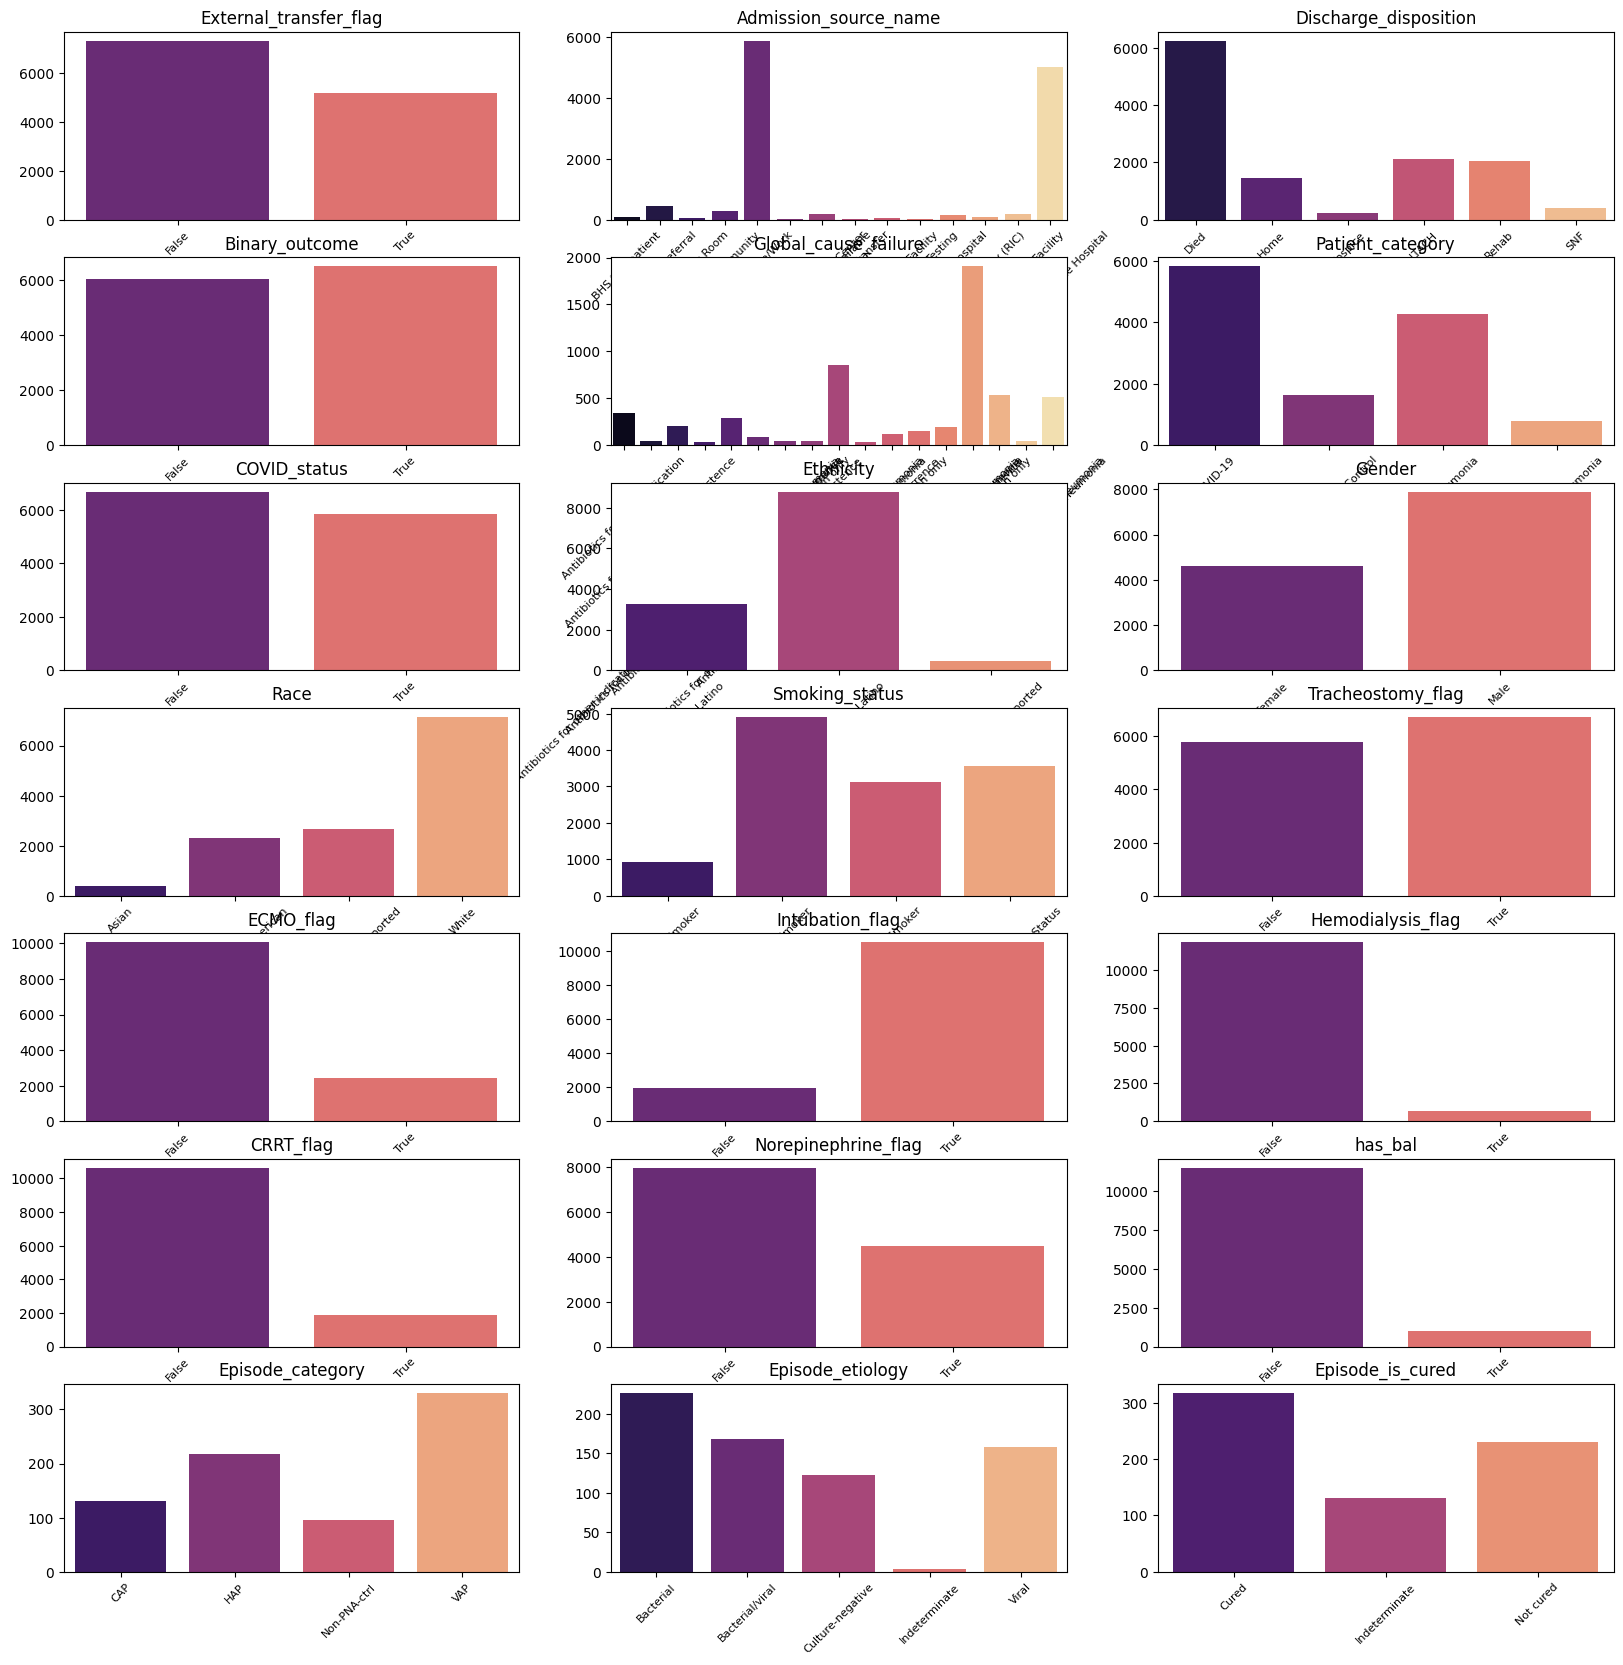

In [15]:
# barplot visualization
barplot_cols = [c for c in categorical if c not in ['Patient_id/ICU_stay/ICU_day']]

# Adjust subplots and figsize
fig, axes = plt.subplots(7, 3,figsize=[20,20])
axes = axes.flatten()

for idx, col_name in enumerate(barplot_cols):
    plt.sca(axes[idx]) # set the current Axes
    #plt.hist(df_categorical[x],density=True)
    sns.countplot(x=col_name, data=df, palette='magma')
    plt.xticks(fontsize=8, rotation=45) # Rotates X-Axis Ticks by 45-degrees
    plt.ylabel('')
    plt.xlabel('')
    plt.title(col_name)

fig.tight_layout()
plt.show()

Checking dominance of a category over the others 

In [16]:
frequencies = df[categorical].apply(pd.Series.value_counts)

dominant_categories = frequencies.idxmax()

threshold = 0.9

high_dominance = []
for variable, dominant_category in dominant_categories.items():
    dominant_frequency = frequencies.loc[dominant_category, variable] / df[categorical].shape[0]
    if dominant_frequency > threshold:
        high_dominance.append(variable)

print('Number of columns: ', {len(high_dominance)})
high_dominance

Number of columns:  {2}


['Hemodialysis_flag', 'has_bal']

It is possible to remove `Hemodialysis_flag` since it has more than 90% of values equal to false. Further analysis will be done on `has_bal`, since it is related to critical episodes. 

#### `External_transfer_flag` and `Admission_source_name`
These two variables convey approximately the same information.

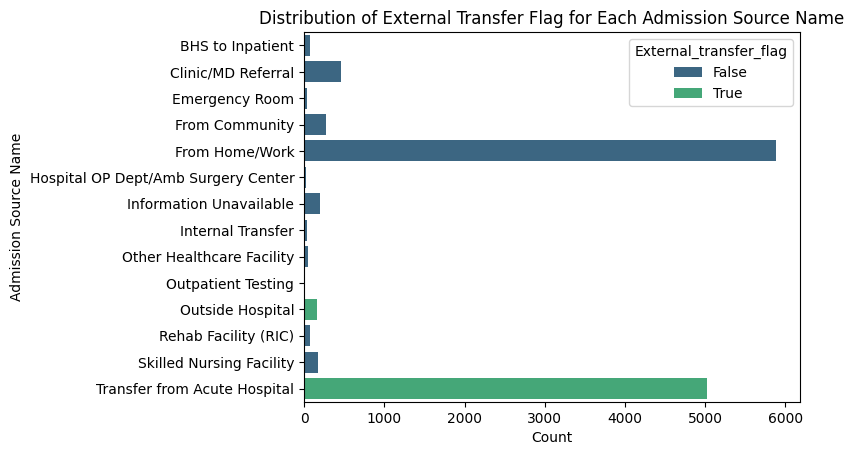

In [17]:
# Plot the distribution of 'External_transfer_flag' for each of the values of 'Admission_source_name'
sns.countplot(y='Admission_source_name', hue=df['External_transfer_flag'].astype(str), data=df, palette='viridis')
plt.xlabel('Count')
plt.ylabel('Admission Source Name')
plt.title('Distribution of External Transfer Flag for Each Admission Source Name')
plt.show()

For our purpose it's sufficient to know if the patient comes from a generic medical facility (every value except for `Home/Work`,`From Community`) or not, for this reason we can create a new boolean column `From_medical_facility`. 

N.B. `Information Unavailable` set `True` as worst case scenario and being only a little percentage.

At the end it's possible to delete the two old features.


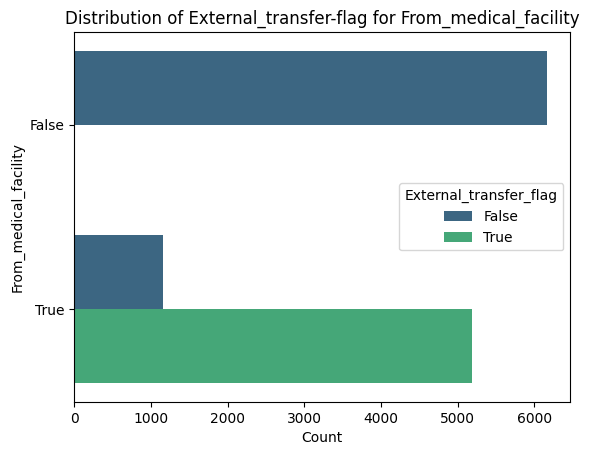

In [18]:
# Create a new variable 'From_medical_facility' based on the values of 'Admission_source_name'
df['From_medical_facility'] = [False if val in ['From Home/Work', 'From Community'] else True for val in df['Admission_source_name']]

# Plot the distribution of 'External_transfer_flag' for each of the values of 'From_medical_facility'
sns.countplot(y='From_medical_facility',  hue=df['External_transfer_flag'].astype(str), data=df, palette='viridis')
plt.xlabel('Count')
plt.ylabel('From_medical_facility')
plt.title('Distribution of External_transfer-flag for From_medical_facility')
plt.show()


#### `Discharge_disposition`
For our purpose it's sufficient only to know if at the end of the ICU stay, the patient is died or not. The specific cause of death is not relevant.

#### `COVID_status`
Checking that this information is already stored in the column `Patient_category` = `COVID_19`

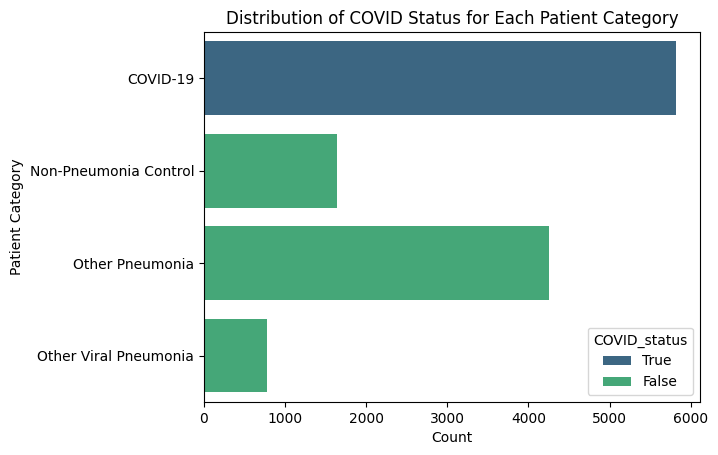

In [19]:
# Let's see the distribution of 'COVID_status' for each of the values of 'Patient_category'.
sns.countplot(y='Patient_category',  hue=df['COVID_status'].astype(str), data=df, palette='viridis')
plt.xlabel('Count')
plt.ylabel('Patient Category')
plt.title('Distribution of COVID Status for Each Patient Category')
plt.show()

All `Patient_category` = `COVID_19` has `COVID_status` = `True`.

#### `Admit_SOFA_score`
This variable can be deleted without any other check by their definition, since the same information is present in the column APS_score in the first day of each ICU_stay

#### `Cumulative_ICU_days` and `Cumulative_intubation_days`
These cumulative data are reported for each observation of the patient. Keeping in mind that our goal is to predict the `binary_outcome' for the day after the current one, these information is not coherent. 


In [20]:
# For example, we show how these columns look for a random patient
# Select a random patient
random_patient_id = np.random.choice(df['Patient_id'].unique())
# Filter the dataset for the selected patient
patient_data = df[df['Patient_id'] == random_patient_id]

print(patient_data[['Cumulative_ICU_days']])
print(patient_data[['Cumulative_intubation_days']])


       Cumulative_ICU_days
10430                   20
10431                   20
10432                   20
10433                   20
10434                   20
10435                   20
10436                   20
10437                   20
10438                   20
10439                   20
10440                   20
10441                   20
10442                   20
10443                   20
10444                   20
10445                   20
10446                   20
10447                   20
10448                   20
10449                   20
10450                   20
       Cumulative_intubation_days
10430                          11
10431                          11
10432                          11
10433                          11
10434                          11
10435                          11
10436                          11
10437                          11
10438                          11
10439                          11
10440                          1

#### `Ethnicity` and `Race`

The values contained in Ethnicity are: ['Hispanic or Latino', 'Not Hispanic or Latino', 'Unknown or Not Reported']
Categories (3, object): ['Hispanic or Latino', 'Not Hispanic or Latino', 'Unknown or Not Reported']
The percentage of unknowns is 3.6494597839135654


<Axes: xlabel='count', ylabel='Ethnicity'>

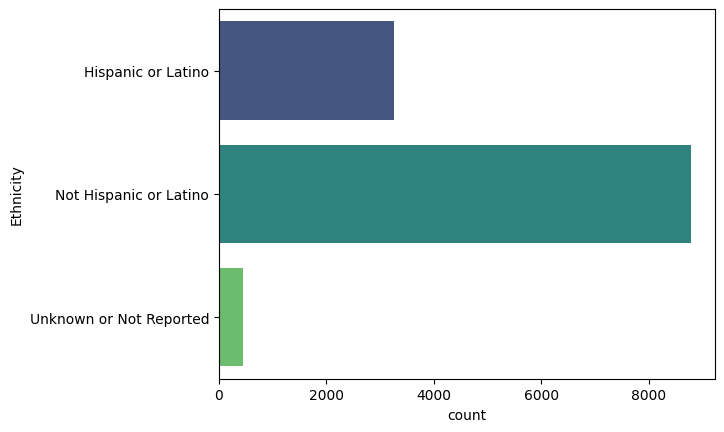

In [21]:
# Ethnicity
print('The values contained in Ethnicity are:', df['Ethnicity'].unique())
# count how many are 'Unknown or Not Reported'
print( 'The percentage of unknowns is', ((df['Ethnicity']=='Unknown or Not Reported').sum())*100/df.shape[0])
# barplot for visualization purposes
sns.countplot(y='Ethnicity', data=df, palette='viridis')

The proposed grouping factor is only partial and it does not cover in a signicant manner the population. We decide to drop the variable `Ethnicity`

The percentage of unknowns is 21.3765506202481


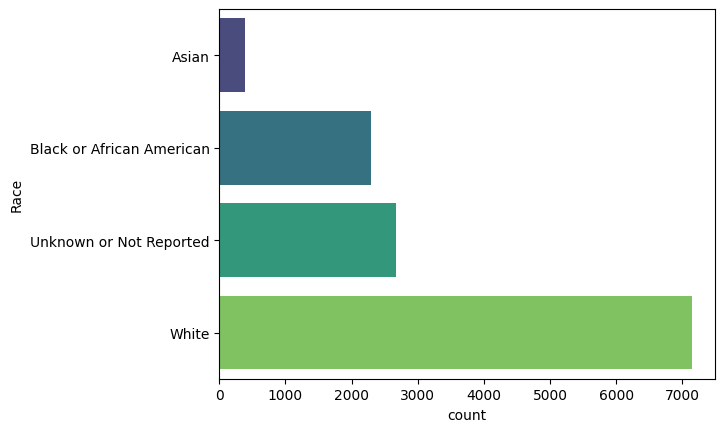

In [22]:
# Race
sns.countplot(y='Race', data=df, palette='viridis')
print( 'The percentage of unknowns is', ((df['Race']=='Unknown or Not Reported').sum())*100/df.shape[0])

It is well known in the medical field the difference between the functioning of the body of white-skin people and black-skin people and the catecorization incoded in the variable `Race` could be signficant for the scope. However, due to the high number of missing values and the impossibility to make inference on them, we decide to drop also the variable `Race`. 

#### `Smoking_status`
With a closer look at the barplot of smoking status, we can immediately notice the significant presence of unknowns. 
The smoking status of a patient is considered relavant to penumonia diseases. It is not possible to make inference on them, and for the moment, instead of dropping 24% of the observation, we decide to non consider the variable `Smoking_status`

The percentage of NaN is 24.88995598239296


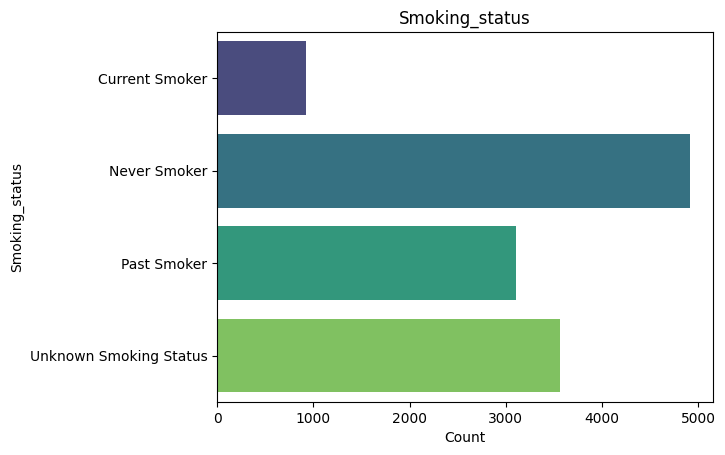

In [23]:
counts = df['Smoking_status'].value_counts()
percentages = counts / len(df) * 100
print('The percentage of NaN is', percentages[2])


sns.countplot(y='Smoking_status', data=df, palette='viridis')
plt.xlabel('Count')
plt.title('Smoking_status')
plt.show()


##### Dropping the selected variables from the dataset

In [24]:
df.drop(['Hemodialysis_flag',
        'Patient_id/ICU_stay/ICU_day',
         'Admission_source_name',
         'External_transfer_flag',
         'Discharge_disposition',
         'COVID_status', 
         'Admit_SOFA_score',
         'Cumulative_ICU_days',
         'Cumulative_intubation_days',
         'Ethnicity',
         'Race',
         'Smoking_status',
         ], axis = 1, inplace = True)

In [25]:
# update 
numerical = df.select_dtypes(include=['float64', 'int64']).columns
discrete = df.select_dtypes(include=['int64']).columns
categorical = df.select_dtypes(include=['category', 'bool']).columns

### Missing values

Let's visualize missing values using heat map, with the following legend:
- **<span style="color:#440154;">purple</span>** = not missing value
- **<yellow style="color:#FDE725;">yellow</span>** = missing value

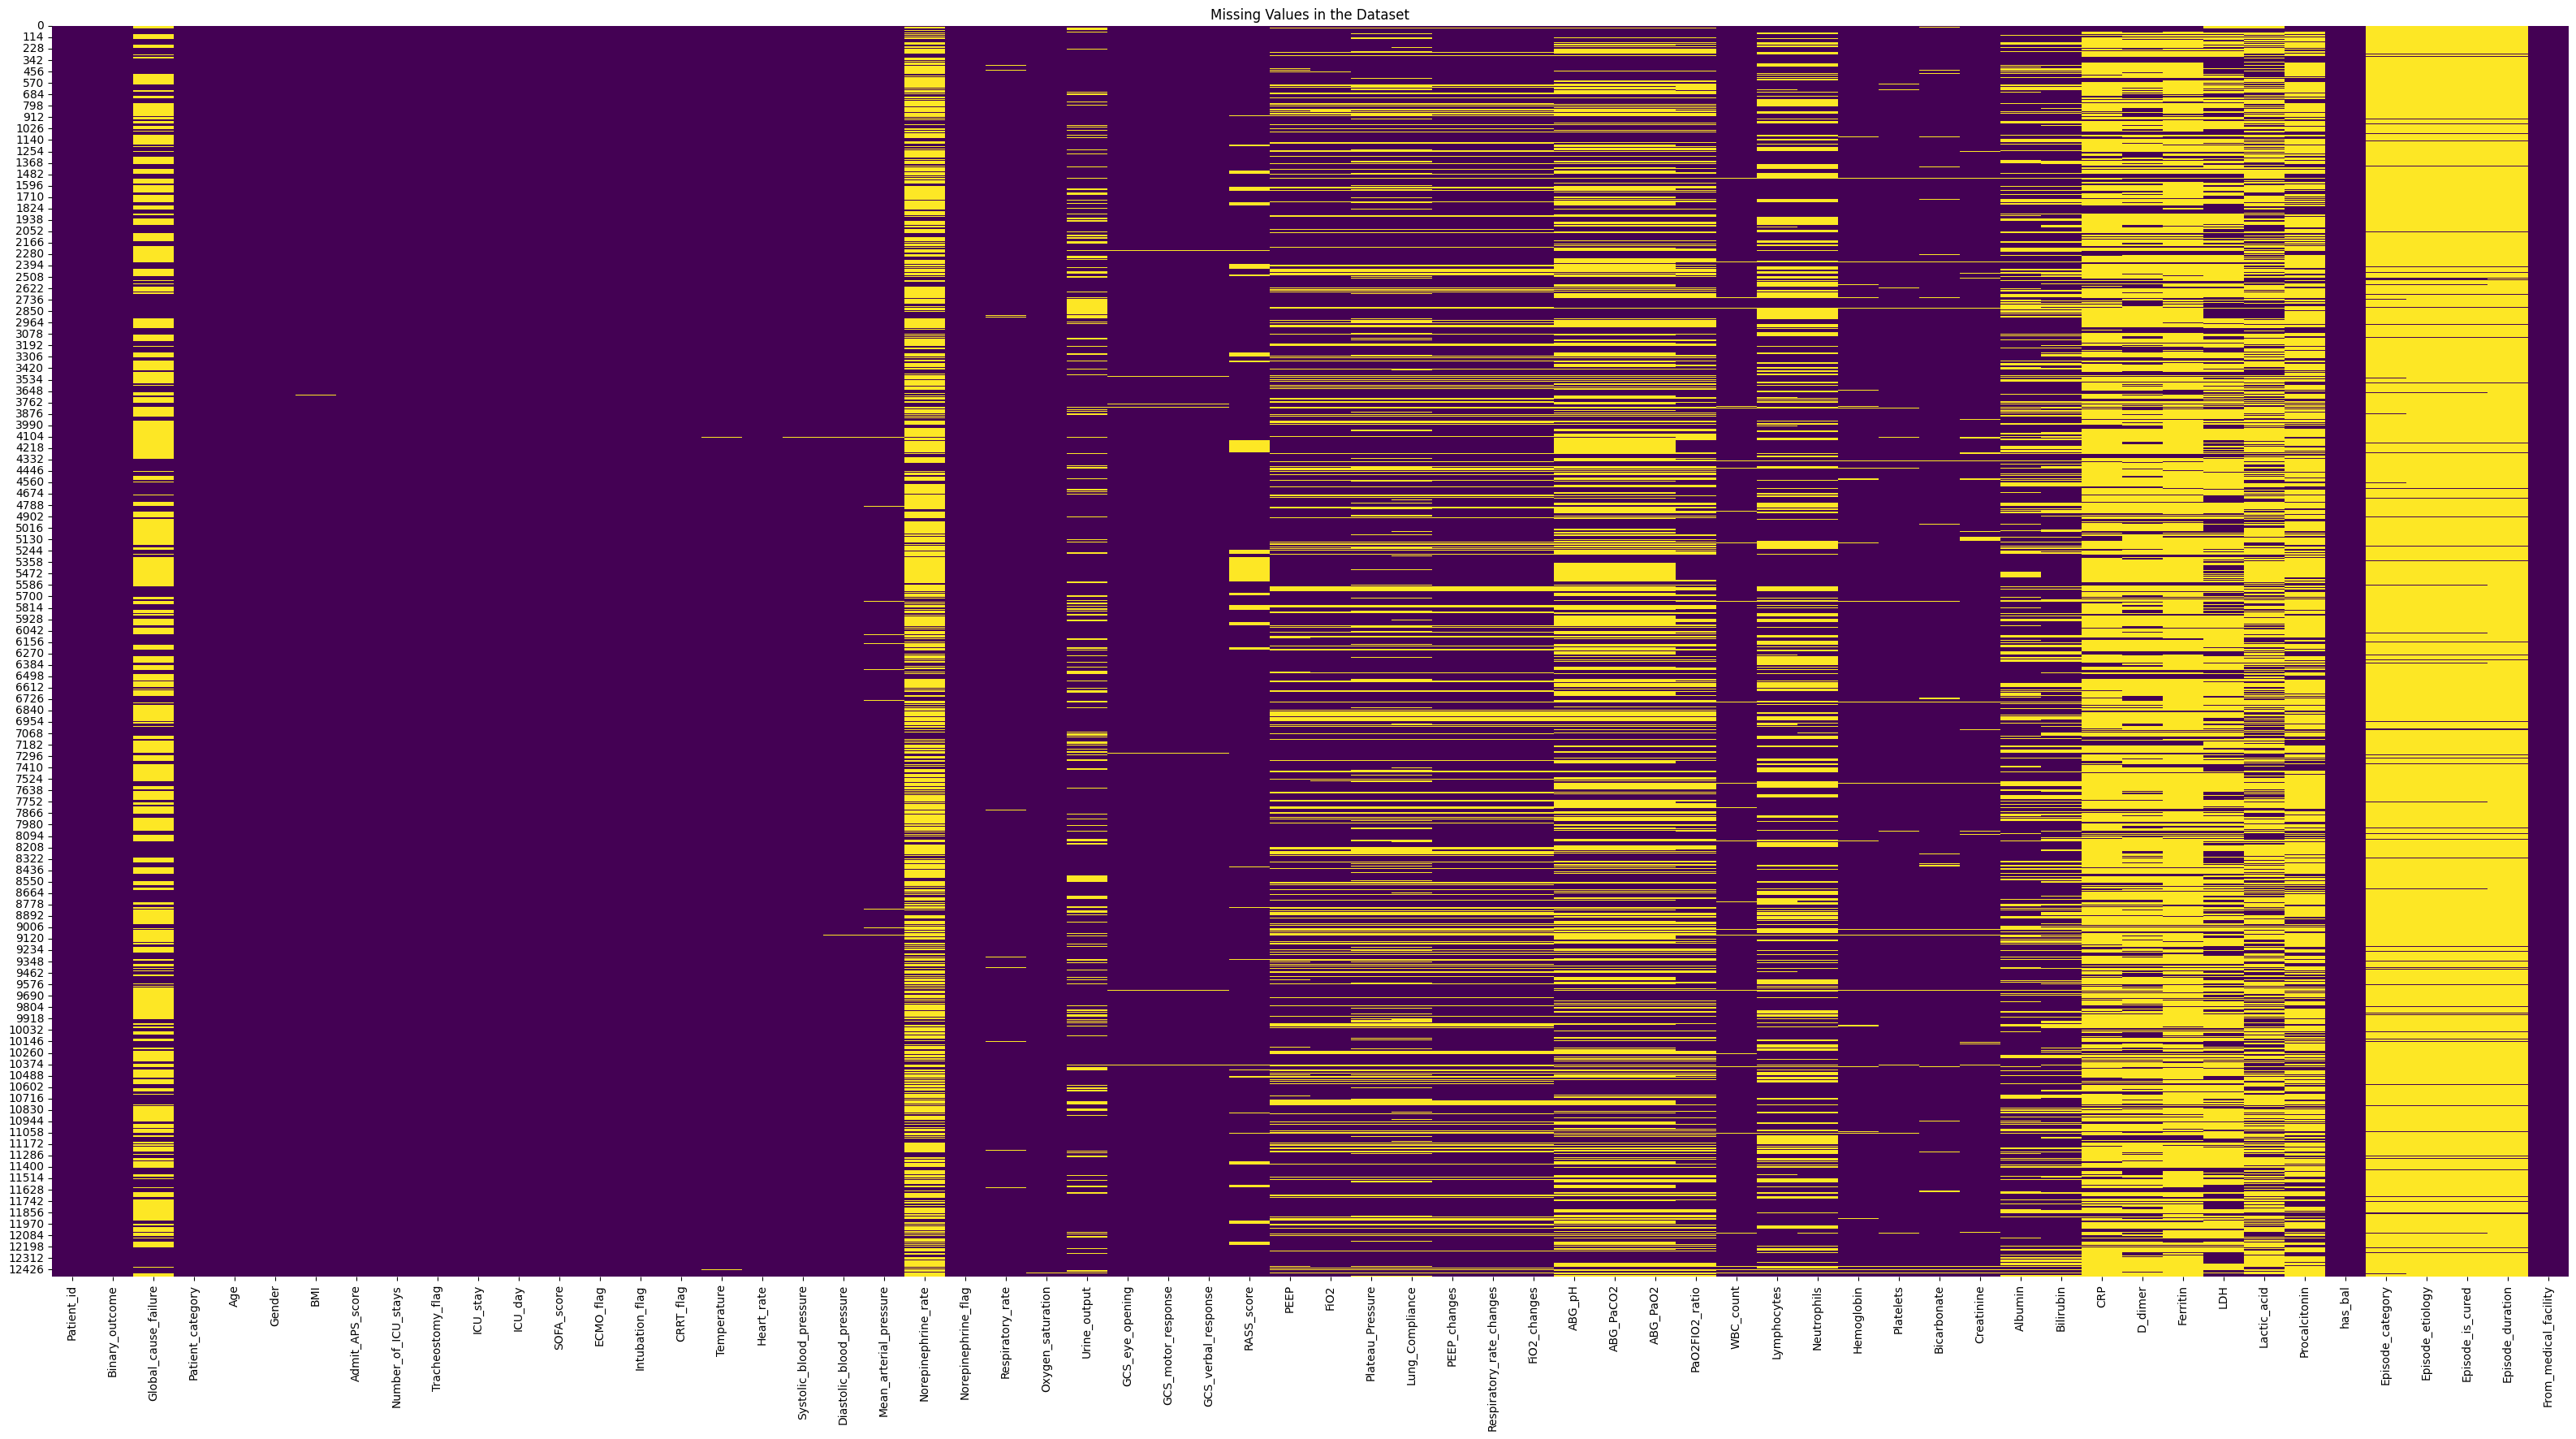

In [26]:
plt.figure(figsize=(40,20))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Values in the Dataset')
plt.show()

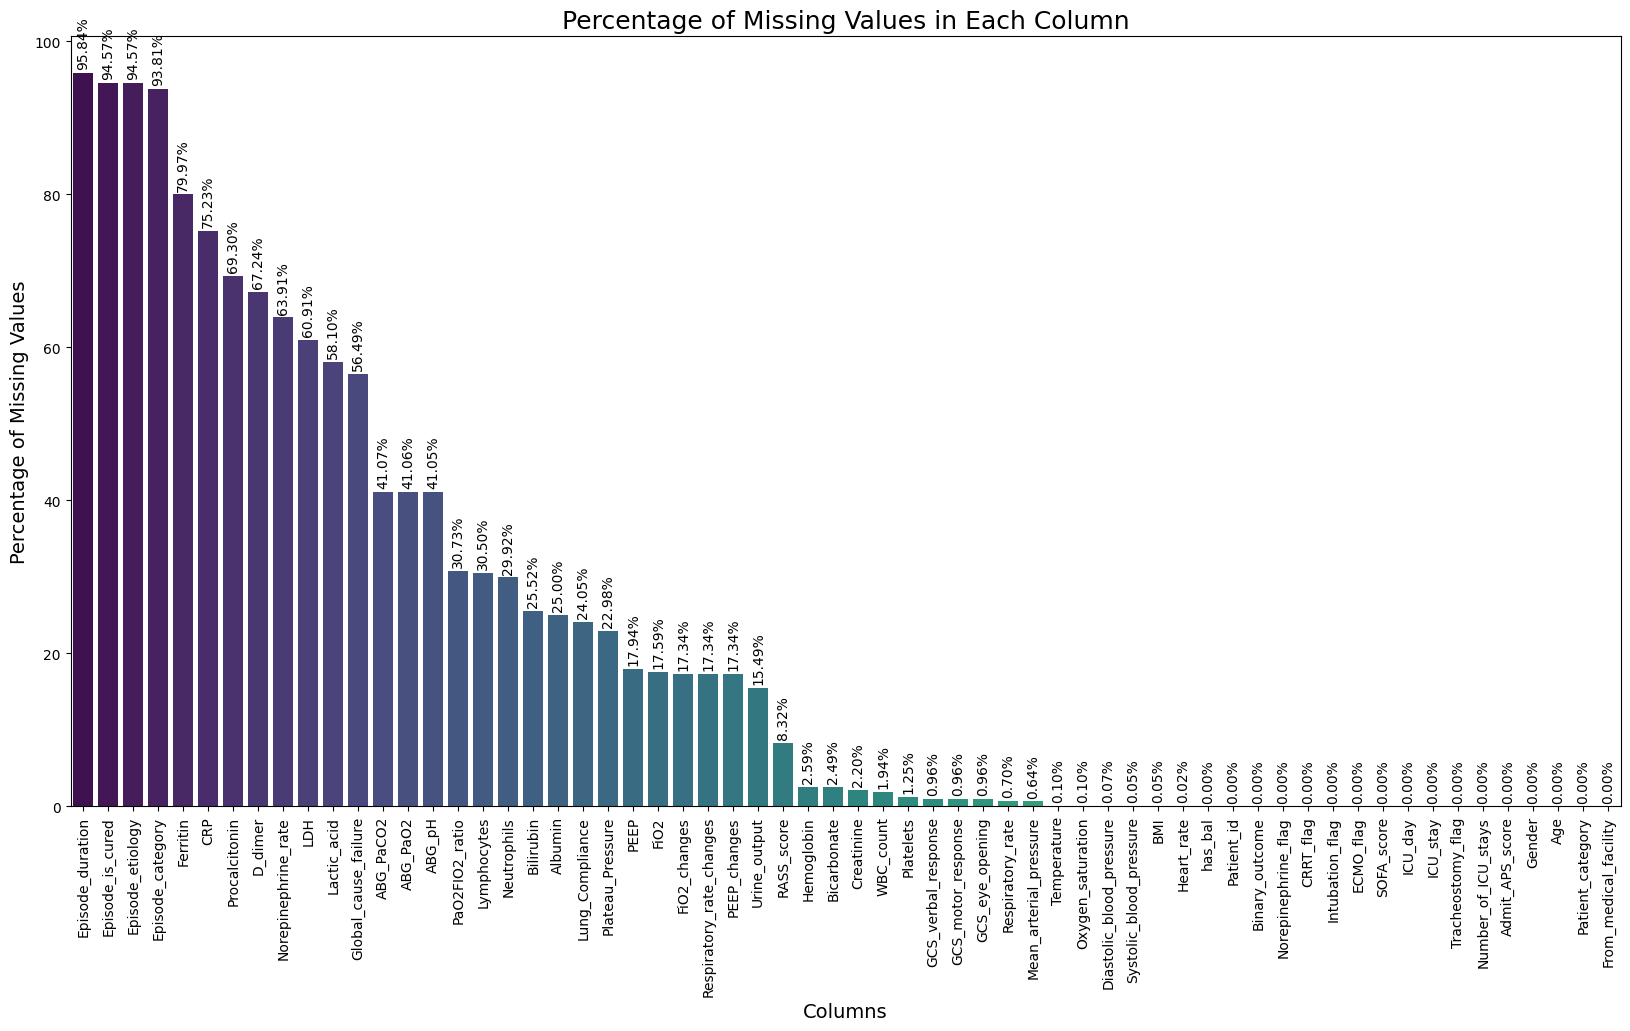

In [27]:
# Computing the percentage of missing values in each column
missing_values = df.isnull().mean().sort_values(ascending=False) * 100
colors = sns.color_palette("viridis", len(missing_values))

# Plotting
plt.figure(figsize=(20, 10))
sns.barplot(x=missing_values.index, y=missing_values.values, palette=colors)
plt.title('Percentage of Missing Values in Each Column', fontsize=18)
plt.xlabel('Columns', fontsize=14)
plt.ylabel('Percentage of Missing Values', fontsize=14)
plt.xticks(rotation=90)

# Add percentage labels on the bars
for index, value in enumerate(missing_values.values):
    plt.text(index, value + 0.5, f'{value:.2f}%', ha='center', va='bottom', fontsize=10, rotation=90, color='black')

plt.show()

We need to find a way to deal with the high number of NaNs. The missing values in the first four columns higlighted in the barplot are episode-related, the missing data are not really missing: if the datum is not present for a particular day, then no episode happened that day. We are gonna see them later. 

For now, we can notice that: 
- `Global_cause_failure`has a high number of nans and it would be impossible to interpolate: it can be dropped.
- `Norepinephrine_rate` has NaNs only when the corresponding flag is equal to 0, hence we can just substitute the NaNs and then drop 'Norepinephrine_flag' since it does not add new informati.on


In [28]:
print('Percentage of missing values for Global_cause_failure', df['Global_cause_failure'].isna().sum()*100/df.shape[0])
df.drop('Global_cause_failure', axis = 1, inplace = True)

df['Norepinephrine_rate'] = df['Norepinephrine_rate'].fillna(0)
df.drop('Norepinephrine_flag', axis = 1, inplace = True)

Percentage of missing values for Global_cause_failure 56.48659463785514


In [29]:
# update 
numerical = df.select_dtypes(include=['float64', 'int64']).columns
discrete = df.select_dtypes(include=['int64']).columns
categorical = df.select_dtypes(include=['category', 'bool']).columns

In [30]:
missing_values2 = df.isnull().mean().sort_values(ascending=False) * 100
missing_values2[missing_values2 > 20]

Episode_duration    95.838335
Episode_is_cured    94.573830
Episode_etiology    94.573830
Episode_category    93.805522
Ferritin            79.967987
CRP                 75.230092
Procalcitonin       69.299720
D_dimer             67.242897
LDH                 60.912365
Lactic_acid         58.095238
ABG_PaCO2           41.072429
ABG_PaO2            41.056423
ABG_pH              41.048419
PaO2FIO2_ratio      30.732293
Lymphocytes         30.500200
Neutrophils         29.915966
Bilirubin           25.522209
Albumin             25.002001
Lung_Compliance     24.049620
Plateau_Pressure    22.977191
dtype: float64

#### Correlation and Missing values

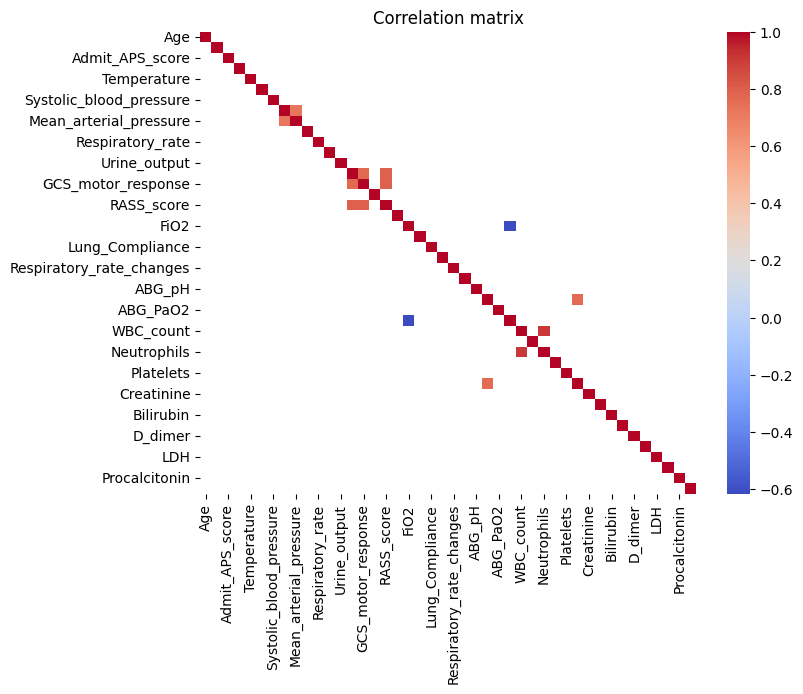

High corr between  Diastolic_blood_pressure  and  Mean_arterial_pressure with  0.72 correlation
High corr between  GCS_eye_opening  and  GCS_motor_response with  0.77 correlation
High corr between  GCS_eye_opening  and  RASS_score with  0.79 correlation
High corr between  GCS_motor_response  and  RASS_score with  0.8 correlation
High corr between  FiO2  and  PaO2FIO2_ratio with  0.62 correlation
High corr between  ABG_PaCO2  and  Bicarbonate with  0.77 correlation
High corr between  WBC_count  and  Neutrophils with  0.91 correlation


In [31]:
# look at correlation matrix for numeric variables
corr_cols = numerical.drop(['Patient_id', 'Number_of_ICU_stays',
                            'ICU_stay', 'ICU_day',])
# correlation matrix too big so we filter for values higher than a certain thereshold
thresh = 0.6
corr_matrix = df[corr_cols].corr()
filtered_corr_matrix = corr_matrix[(corr_matrix > thresh) | (corr_matrix < -thresh)]

plt.figure(figsize=(8, 6))
sns.heatmap(filtered_corr_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation matrix')
plt.show()

# printing the pairs with very high correlation
for i in range(len(corr_matrix.columns)):
    # look only at the upper triangole
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.6:
            print("High corr between ", corr_matrix.columns[i], " and ", corr_matrix.columns[j], "with ", round(abs(corr_matrix.iloc[i, j]),2), "correlation")



- drop Systolic and Diastolic, since they express the same thing as Mean arterial and highly correlated
- drop RASS score since it is higly correlated with multiple variables (GCS scores)
- drop WBC_count and keep Neutrophilis

In [32]:
df.drop(['RASS_score', 'Systolic_blood_pressure',
       'Diastolic_blood_pressure', 'WBC_count'], axis = 1, inplace = True)

# update numerical
numerical = df.select_dtypes(include=['float64', 'int64']).columns

We noticed that BMI is only missing for 1 patient, so we replace it with the mean grouped by gender

In [33]:
(df.loc[df['BMI'].isna(), 'Patient_id']).unique()

array([2636])

In [34]:
df['BMI'] = df.groupby(['Gender'])['BMI'].transform(lambda x: x.fillna(x.mean()))

Check on columns with very high NaN percentage

In [35]:
num_nans = df[numerical].isna().sum()/df.shape[0]
num_nans_df = pd.DataFrame({'value': num_nans})

In [36]:
low_nans = (num_nans_df['value'] > 0.000001) & (num_nans_df['value'] < 0.3)
low_nans_cols = num_nans.loc[low_nans]
high_nans = (num_nans_df['value'] >= 0.3)
high_nans_cols = num_nans.loc[high_nans]

In [37]:
low_nans_cols

Temperature                 0.001040
Heart_rate                  0.000160
Mean_arterial_pressure      0.006403
Respiratory_rate            0.007043
Oxygen_saturation           0.000960
Urine_output                0.154862
GCS_eye_opening             0.009604
GCS_motor_response          0.009604
GCS_verbal_response         0.009604
PEEP                        0.179352
FiO2                        0.175910
Plateau_Pressure            0.229772
Lung_Compliance             0.240496
PEEP_changes                0.173429
Respiratory_rate_changes    0.173429
FiO2_changes                0.173429
Neutrophils                 0.299160
Hemoglobin                  0.025930
Platelets                   0.012485
Bicarbonate                 0.024890
Creatinine                  0.022009
Albumin                     0.250020
Bilirubin                   0.255222
dtype: float64

In [38]:
high_nans_cols

ABG_pH              0.410484
ABG_PaCO2           0.410724
ABG_PaO2            0.410564
PaO2FIO2_ratio      0.307323
Lymphocytes         0.305002
CRP                 0.752301
D_dimer             0.672429
Ferritin            0.799680
LDH                 0.609124
Lactic_acid         0.580952
Procalcitonin       0.692997
Episode_duration    0.958383
dtype: float64

We decide to drop the variables with at least 30% of missing data. These are:

- `ABG_pH`
- `ABG_PaCO2`
- `ABG_PaO2`
- `PaO2FIO2_ratio`
- `Lymphocytes`
- `CRP`
- `D_dimer`
- `Ferritin`
- `LDH`
- `Lactic_acid`
- `Procalcitonin`

In [39]:
df.drop(['ABG_pH',
 'ABG_PaCO2',
 'ABG_PaO2',
 'PaO2FIO2_ratio',
 'Lymphocytes',
 'CRP',
 'D_dimer',
 'Ferritin',
 'LDH',
 'Lactic_acid',
 'Procalcitonin'], axis = 1, inplace = True)

For the columns that instead have a low number of NaNs, we've decided to perform an interpolation using the mean of the 2 closest values, always grouping by Patient_id and ICU_stay

In [40]:
# Function to substitute NaNs with mean
def fill_missing_with_mean_extremes(series):
    # Indexes of missing values
    nan_indices = np.where(series.isna())[0]
    
    # Blocks of missing values
    nan_blocks = np.split(nan_indices, np.where(np.diff(nan_indices) != 1)[0] + 1)
    
    for block in nan_blocks:
        if len(block) == 0:
            continue
        start_idx = block[0] - 1
        end_idx = block[-1] + 1

        # Case in which there is not either a previous value or a forward value
        if start_idx < 0 or end_idx >= len(series):
            continue

        # Compute mean
        mean_value = (series.iloc[start_idx] + series.iloc[end_idx]) / 2

        series.iloc[block] = mean_value

    return series

cols_to_subsitute = low_nans_cols.index
for col in cols_to_subsitute:
    df[col] = df.groupby(['Patient_id', 'ICU_stay'])[col].transform(fill_missing_with_mean_extremes)


# case in which the first values or the last ones are nans
for col in cols_to_subsitute:
    df[col] = df.groupby(['Patient_id', 'ICU_stay'])[col].transform(lambda x: x.ffill().bfill())


Discrete variables need to be rounded

In [41]:
df[discrete] = df[discrete].round()

In [42]:
df.isna().sum()

Patient_id                      0
Binary_outcome                  0
Patient_category                0
Age                             0
Gender                          0
BMI                             0
Admit_APS_score                 0
Number_of_ICU_stays             0
Tracheostomy_flag               0
ICU_stay                        0
ICU_day                         0
SOFA_score                      0
ECMO_flag                       0
Intubation_flag                 0
CRRT_flag                       0
Temperature                     0
Heart_rate                      0
Mean_arterial_pressure          0
Norepinephrine_rate             0
Respiratory_rate                0
Oxygen_saturation               0
Urine_output                   52
GCS_eye_opening                 2
GCS_motor_response              2
GCS_verbal_response             2
PEEP                          482
FiO2                          482
Plateau_Pressure              504
Lung_Compliance               516
PEEP_changes  

We still have some nans, due to the fact that certain patients in certain ICU stays did not have any value measured for some variables. 
Hence we will delete these groups (Patient_id - ICU_stay) from our study, that for now we keep to allow a correct feature engineering process, since in some cases we will need the complete time-series for each patient. 

## Feature Engineering

### Feature Distributions by Binary Outcome

In the following plots, we display the distribution of each feature, distinguishing between two groups: `Alive` and `Dead`. The green histograms represent the features for patients who were alive (Binary outcome = 0), while the yellow histograms represent the features for patients who were dead (Binary outcome = 1). Each plot helps to visualize how different features are distributed across the two outcome groups, providing insights into the potential relationships between these features and patient outcomes.

The features considered in these plots exclude the patient ID and related variables to focus on meaningful clinical parameters.

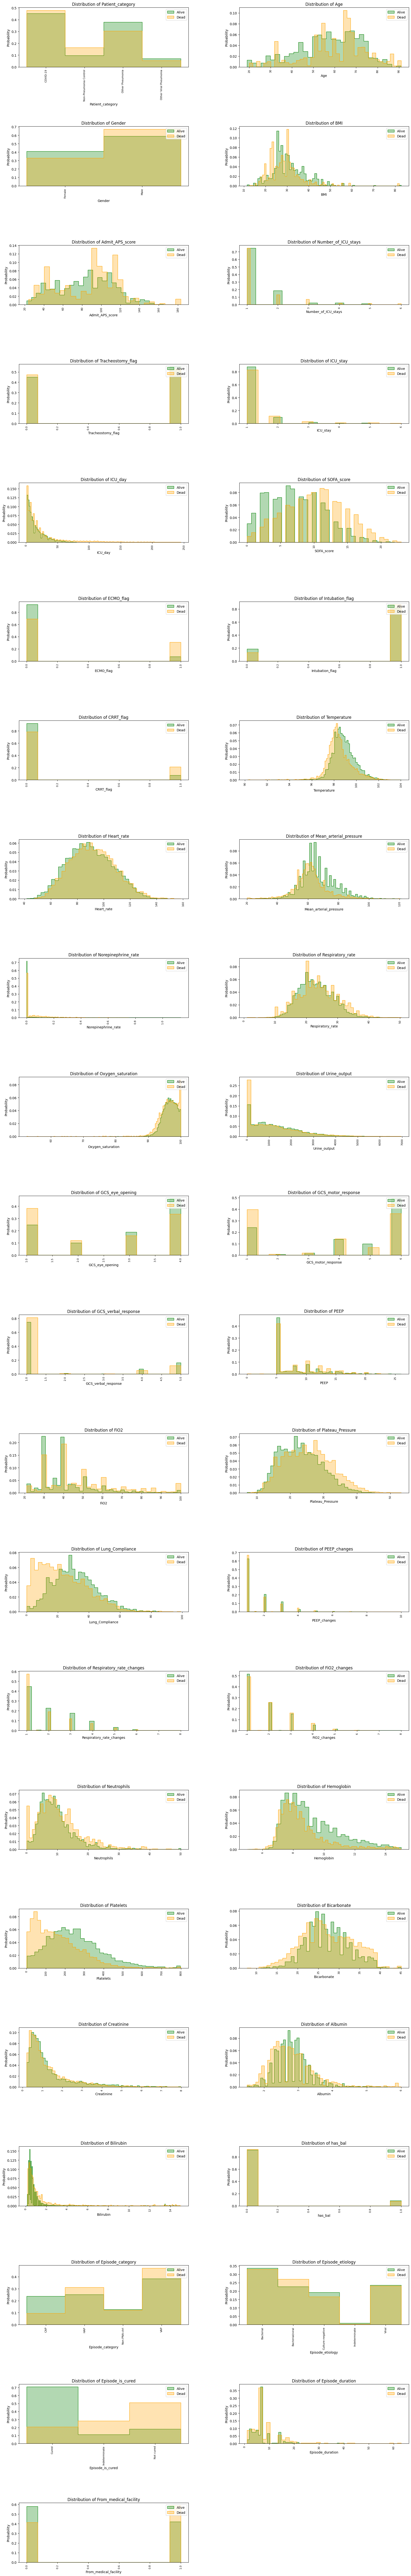

In [43]:
# Define variables that should not be plotted
no_plot = ['Patient_id']
P = df.drop(columns=no_plot)

# Define columns excluding the binary outcome
cols_wo_bin = [col for col in P.columns if col != 'Binary_outcome']

# Set up the plotting area with 2 columns
num_cols = 2
num_rows = (len(cols_wo_bin) + num_cols - 1) // num_cols  # Calculate the number of rows needed
fig, axes = plt.subplots(ncols=num_cols, nrows=num_rows, figsize=(20, 5 * num_rows))
fig.tight_layout(pad=12)

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot histograms for each variable, colored by the binary outcome, using stat='probability' to show probability instead of count
for i, col in enumerate(cols_wo_bin):
    # Plot for Binary_outcome == 0 (Alive)
    sns.histplot(P[P['Binary_outcome'] == 0][col], color="green", element="step", ax=axes[i], alpha=0.3, stat='probability')
    # Plot for Binary_outcome == 1 (Dead)
    sns.histplot(P[P['Binary_outcome'] == 1][col], color="orange", element="step", ax=axes[i], alpha=0.3, stat='probability')

    # Set legend and labels
    axes[i].legend(labels=['Alive', 'Dead'])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_ylabel('Probability')
    axes[i].tick_params(axis='x', rotation=90, labelsize=8)


# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust space between plots
plt.subplots_adjust(hspace=1, wspace=0.3)  # Adjusted hspace and wspace for better spacing

# Show the plot
plt.show()


### `has_bal`

As an objective of our project we want to put some extra focus on the variable that represents if a patient has undergone a Broncho-Alveolar Lavage.

We wanted to create a score that increases when a BAL is performed and decreases over time, of course grouping for Patient id and ICU stay.

We came up with this idea:

$$score(x, t) = \frac{x}{(t + 1)^{a}}$$

where:
- $x$ is the number of BAL, that increases when the variable 'has_bal' is true
- $t$ is the time from last BAL in days, normalized over the number of icu days
- a = 0.25, we wanted the score to decrease nor too slowly nor too fastly

We needed to use $t+1$ in the denominator to deal with the case where $t=0$, otherwise our score function would assume an indeterminate value.

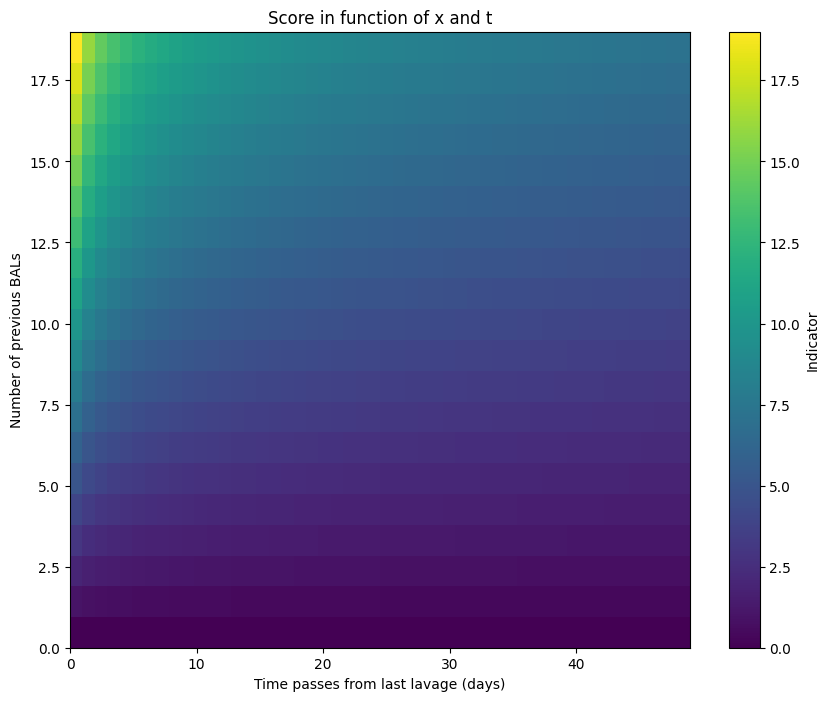

In [44]:
# Understanding our new score

def estimate_bal(x, t):

    # Normalizing coefficient (denominator)
    coefficiente_tempo = 1 / (t + 1)**0.25
    
    # Indicator 
    indicator = x * coefficiente_tempo
    
    return indicator

# Grid for values of x and t
x_values = np.arange(0, 20, 1)
t_values = np.arange(0, 50, 1)

# Matrix to save the indicators
indicators = np.zeros((len(x_values), len(t_values)))

# Compute indicators
for i, x in enumerate(x_values):
    for j, t in enumerate(t_values):
        indicators[i, j] = estimate_bal(x, t)


plt.figure(figsize=(10, 8))
plt.imshow(indicators, extent=(t_values.min(), t_values.max(), x_values.min(), x_values.max()), origin='lower', aspect='auto', cmap='viridis')
plt.colorbar(label='Indicator')
plt.xlabel('Time passes from last lavage (days)')
plt.ylabel('Number of previous BALs')
plt.title('Score in function of x and t')
plt.show()

Cumulative days from previous BAL

In [45]:
df['has_bal'] = df['has_bal'].astype(int)
df['cumulative_has_bal'] = df.groupby(['Patient_id', 'ICU_stay'])['has_bal'].cumsum()
df['days_from_last_bal'] = np.zeros(len(df))

groups = df.groupby(['Patient_id', 'ICU_stay'])

for (id, stay), group in groups:
    global_index_start = group.index[0]  # index of first element
    global_index_end = group.index[-1]  # last index of element
    for loc_index, global_index in enumerate(group.index):
        global_index = global_index_start + loc_index  # global index
        if loc_index != 0:

            if df.at[global_index, 'has_bal'] == 0:
               df.at[global_index, 'days_from_last_bal'] = (df.at[global_index - 1, 'days_from_last_bal'] + 1) 
        else:
            if df.at[global_index, 'has_bal'] == 0:
               df.at[global_index, 'days_from_last_bal'] += 1

df['has_bal'] = df['has_bal'].astype(bool)

Applying our score function

In [46]:
df['bal_score']=df['cumulative_has_bal']/(1+(df['days_from_last_bal']/df['ICU_day']))**0.25

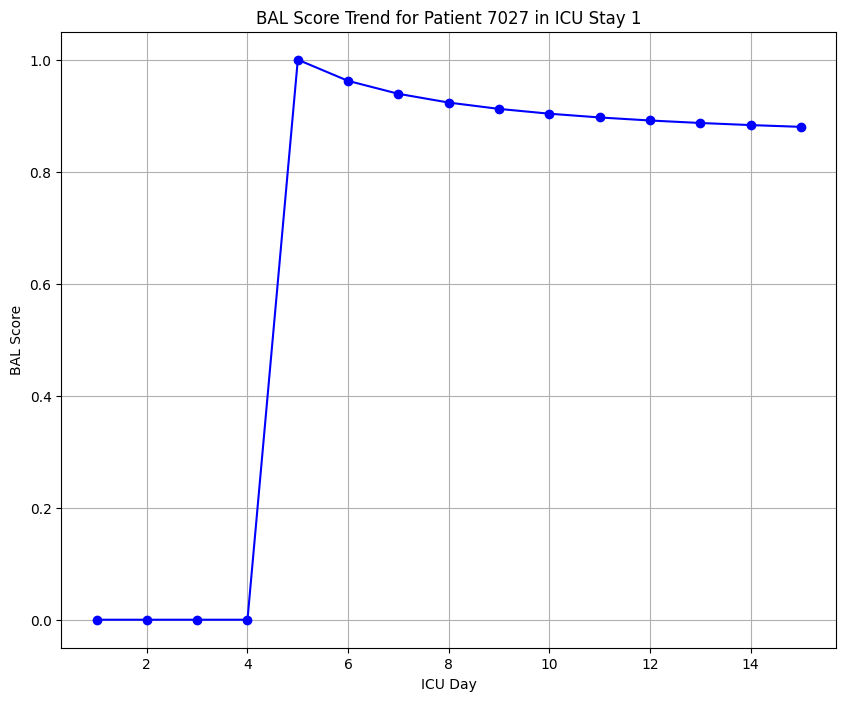

In [47]:
# plot the bal_score trend for a  random patient s a function of the number the icu day of a random icu stay

plt.figure(figsize=(10, 8))
# patient_id = np.random.choice(df['Patient_id'].unique())
patient_id=7027
# icu_stay = np.random.choice(df[df['Patient_id'] == patient_id]['ICU_stay'].unique())
icu_stay=1
patient_data = df[(df['Patient_id'] == patient_id) & (df['ICU_stay'] == icu_stay)]
plt.plot(patient_data['ICU_day'], patient_data['bal_score'], marker='o', linestyle='-', color='b')
plt.xlabel('ICU Day')
plt.ylabel('BAL Score')
plt.title(f'BAL Score Trend for Patient {patient_id} in ICU Stay {icu_stay}')
plt.grid(True)
plt.show()

In [48]:
# now it is possible to drop the temporary variable `days_from_last_bal`
df.drop('days_from_last_bal', axis=1, inplace=True)

### Episodes related variables
First we investigate the last 4 columns concering the episodes: 
- Duration
- Etiology
- Category
- Cured/ not cured

We first show the distirbution of these variables distinguished by the binary outcome

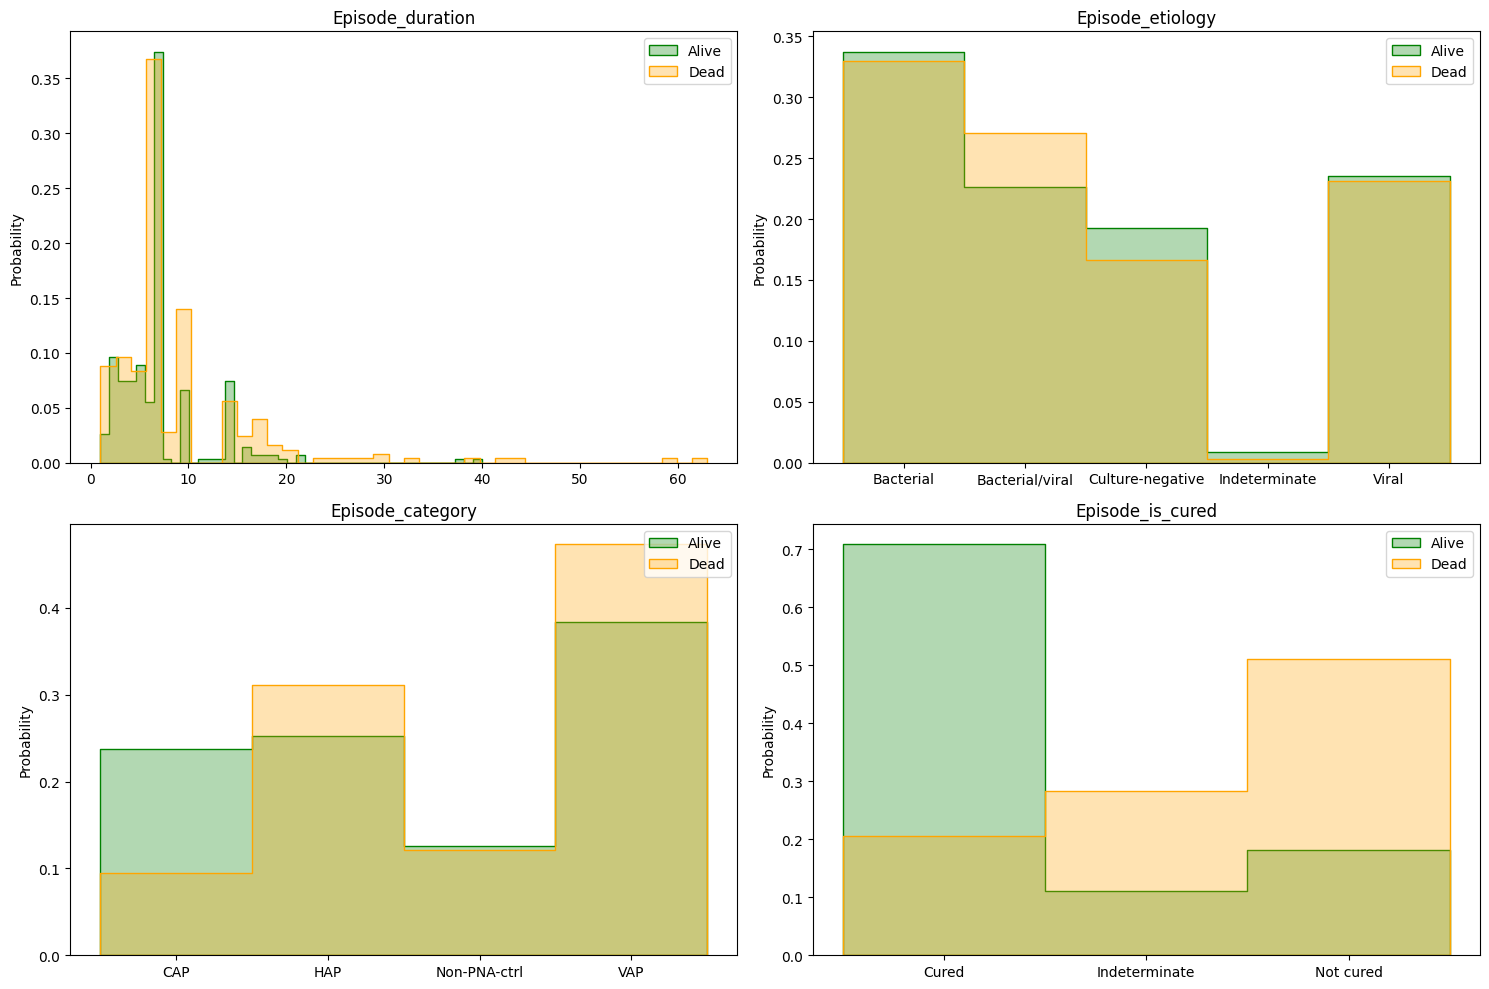

In [49]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

features = ['Episode_duration', 'Episode_etiology', 'Episode_category', 'Episode_is_cured']

for ax, feature in zip(axes.flat, features):
    sns.histplot(df[df['Binary_outcome'] == 0][feature], color="green", element="step", alpha=0.3, stat='probability', ax=ax)
    sns.histplot(df[df['Binary_outcome'] == 1][feature], color="orange", element="step", alpha=0.3, stat='probability', ax=ax)
    ax.legend(labels=['Alive', 'Dead'])
    ax.set_xlabel('')
    ax.set_title(feature)

plt.tight_layout()
plt.show()

- Episode_is_cured:
  
Since there is a very evident difference between alive and dead when an episode is cured or not, we decided to count the number of cured and not cured episodes for each patient and ICU_stay. To account for the worst case scenario, we consider indeterminate episodes as not cured. The counters are scaled with respect to the ICU_day. At the end we obtain two new features: Scaled_cured_episodes and Scaled_not_cured_episodes. 

- Episode_etiology and Episode_category
  
We also need to pay close attention to the case in which 'Episode_etiology' is 'Viral'. The duration of the episode is not specified in the dataset in the case of a Viral-type episode and it seems particulary important from the research (https://www.jci.org/articles/view/170682). 
We decide to treat this case as a 'neverending' episode. As a consequence, we consider that the viral episodes lasts until the last day in the hosital or the occurence of a different type of episode. This choice could be considered as drastic, however, in our first attempts, we saw that the models predict badly the deaths of the patients and we want to give them more importance to see if the recall score improves. At the end, this variable is discarded, since Episode_category resulted to be more important. 

- Episode_duration is specified at the first day of the manifestation of the episde and not for all the types of the episodes. This column is corrected in order to have updated in time values. As specified above, in the cases in which the duration is not specified, we consider the episode as neverending. 
  



In [50]:
# how many episodes per icu stay
df['Scaled_cured_episodes'] = np.zeros(len(df))
df['Scaled_not_cured_episodes'] = np.zeros(len(df))

groups = df.groupby(['Patient_id', 'ICU_stay'])

for (id, stay), group in groups:
    global_index_start = group.index[0]  # Get the global index of the first element of the group
    global_index_end = group.index[-1]  # get the last index of the group
    for loc_index, global_index in enumerate(group.index):
        global_index = global_index_start + loc_index  # Compute global index
        if pd.notna(group.loc[global_index, 'Episode_category']) and \
            loc_index != 0:

            if df.at[global_index, 'Episode_is_cured'] == 'Cured':
               df.at[global_index, 'Scaled_cured_episodes'] = (df.at[global_index - 1, 'Scaled_cured_episodes'] + 1) 

            else:  # this also consider indeterminate as not cured
                df.at[global_index, 'Scaled_not_cured_episodes'] = df.at[global_index - 1, 'Scaled_not_cured_episodes'] + 1
        elif pd.notna(group.loc[global_index, 'Episode_category']):
            if df.at[global_index, 'Episode_is_cured'] == 'Cured':
               df.at[global_index, 'Scaled_cured_episodes'] += 1
            else:
               df.at[global_index, 'Scaled_not_cured_episodes'] += 1
        elif loc_index != 0:
            df.at[global_index, 'Scaled_cured_episodes'] = df.at[global_index - 1, 'Scaled_cured_episodes']
            df.at[global_index, 'Scaled_not_cured_episodes'] = df.at[global_index - 1, 'Scaled_not_cured_episodes']

        # now we also substitute the case for viral and not cured
        if (df.at[global_index, 'Episode_etiology'] == 'Viral' and \
           df.at[global_index, 'Episode_is_cured'] == 'Not cured') or \
            df.at[global_index, 'Episode_is_cured'] == 'Indeterminate':
           i = global_index + 1
           flag = 0
           while flag == 0 and i < global_index_end:
               if pd.notna(df.at[i, 'Episode_category']):
                 flag = 1
               else:
                 df.at[i, 'Episode_category'] = df.at[global_index, 'Episode_category']
                 i += 1


# put the count only at the end of the duration (if the episode is not viral)
for i in range(len(df)):
    if  pd.notna(df.at[i, 'Episode_is_cured']) and \
       (df.at[i, 'Episode_etiology'] != 'Viral') and \
       (df.at[i, 'Episode_is_cured'] != 'Indeterminate') and \
       pd.notna(df.at[i, 'Episode_duration']):
      
         index = i + int(df.at[i, 'Episode_duration']) - 1

         for j in range(i, index):
          if df.at[j, 'Scaled_cured_episodes'] != 0:
            df.at[j, 'Scaled_cured_episodes'] -= 1
          if df.at[j, 'Scaled_not_cured_episodes'] != 0:
            df.at[j, 'Scaled_not_cured_episodes'] -= 1
          i = index


# normalize with respect to the ICU day
col = df['Scaled_cured_episodes']/df['ICU_day']
col2 = df['Scaled_not_cured_episodes']/df['ICU_day']
df['Scaled_cured_episodes'] = col
df['Scaled_not_cured_episodes'] = col2

We fill the NaNs of the 'Episode_category' with the episode itself for its entire duration. If a patient is not experiencing a episode we just put 'No episode'

In [51]:
def propagate_episode_category(df):

    for idx, row in df.iterrows():
        if pd.notna(row['Episode_category']) and pd.notna(row['Episode_duration']):
            category = row['Episode_category']
            duration = int(row['Episode_duration'])
            
            
            df.loc[idx:idx+duration-1, 'Episode_category'] = category

    return df

# fill df['Episode_category'] with 'No episode'
df['Episode_category'] = df['Episode_category'].cat.add_categories('No episode')
df['Episode_category'].fillna('No episode', inplace=True)
df['Episode_category'] = df['Episode_category'].astype(str)
df = propagate_episode_category(df)
df['Episode_category'] = df['Episode_category'].astype('category')

In [52]:
df['Episode_category'].unique()

['CAP', 'VAP', 'No episode', 'Non-PNA-ctrl', 'HAP']
Categories (5, object): ['CAP', 'HAP', 'No episode', 'Non-PNA-ctrl', 'VAP']

In [53]:
df['Episode_category'].isna().sum()

0

Lastly we want to create a cumulative duration for each episode

In [54]:
# Function to create a cumulative sequence
def replace_with_cumulative(df2, column):
    new_values = []
    for i in range(len(df2)):
        if not np.isnan(df2.at[i, column]):
            
            val = int(df2.at[i, column])
            for j in range(1, val + 1):
                if i + j - 1 < len(df2):
                    new_values.append(j)
                else:
                    new_values.append(np.nan)
        elif len(new_values) < i + 1:
            new_values.append(np.nan)
    
    # add Nans to keep same length
    while len(new_values) < len(df2):
        new_values.append(np.nan)
    
    return new_values

df['Episode_duration_cumulative'] = replace_with_cumulative(df, 'Episode_duration')
df['Episode_duration_cumulative'].fillna(0, inplace=True)

In [55]:
# cumulative for viral episodes

for (id, stay), group in groups:
    global_index_start = group.index[0]
    for loc_index, global_index in enumerate(group.index):
        global_index = global_index_start + loc_index  # Compute global index
        if df.at[global_index, 'Episode_etiology'] == 'Viral':
            df.at[global_index, 'Episode_duration_cumulative'] += 1
        elif loc_index != 0 and df.at[global_index, 'Episode_duration_cumulative'] == 0 and \
             df.at[global_index, 'Episode_category'] == df.at[global_index - 1, 'Episode_category']:
            df.at[global_index, 'Episode_duration_cumulative'] = df.at[global_index - 1, 'Episode_duration_cumulative'] + 1


df['Episode_duration_cumulative']=df['Episode_duration_cumulative'].astype('int64')

We only keep the new variables we have created

In [56]:
# drop etiology and is_cured
df.drop(['Episode_etiology', 'Episode_is_cured', 'Episode_duration'], axis = 1, inplace = True)

At the end we have: 
- Episode_duration_cumulative
- Episode_category
- Scaled_cured_episodes
- Scaled_not_cured_episodes

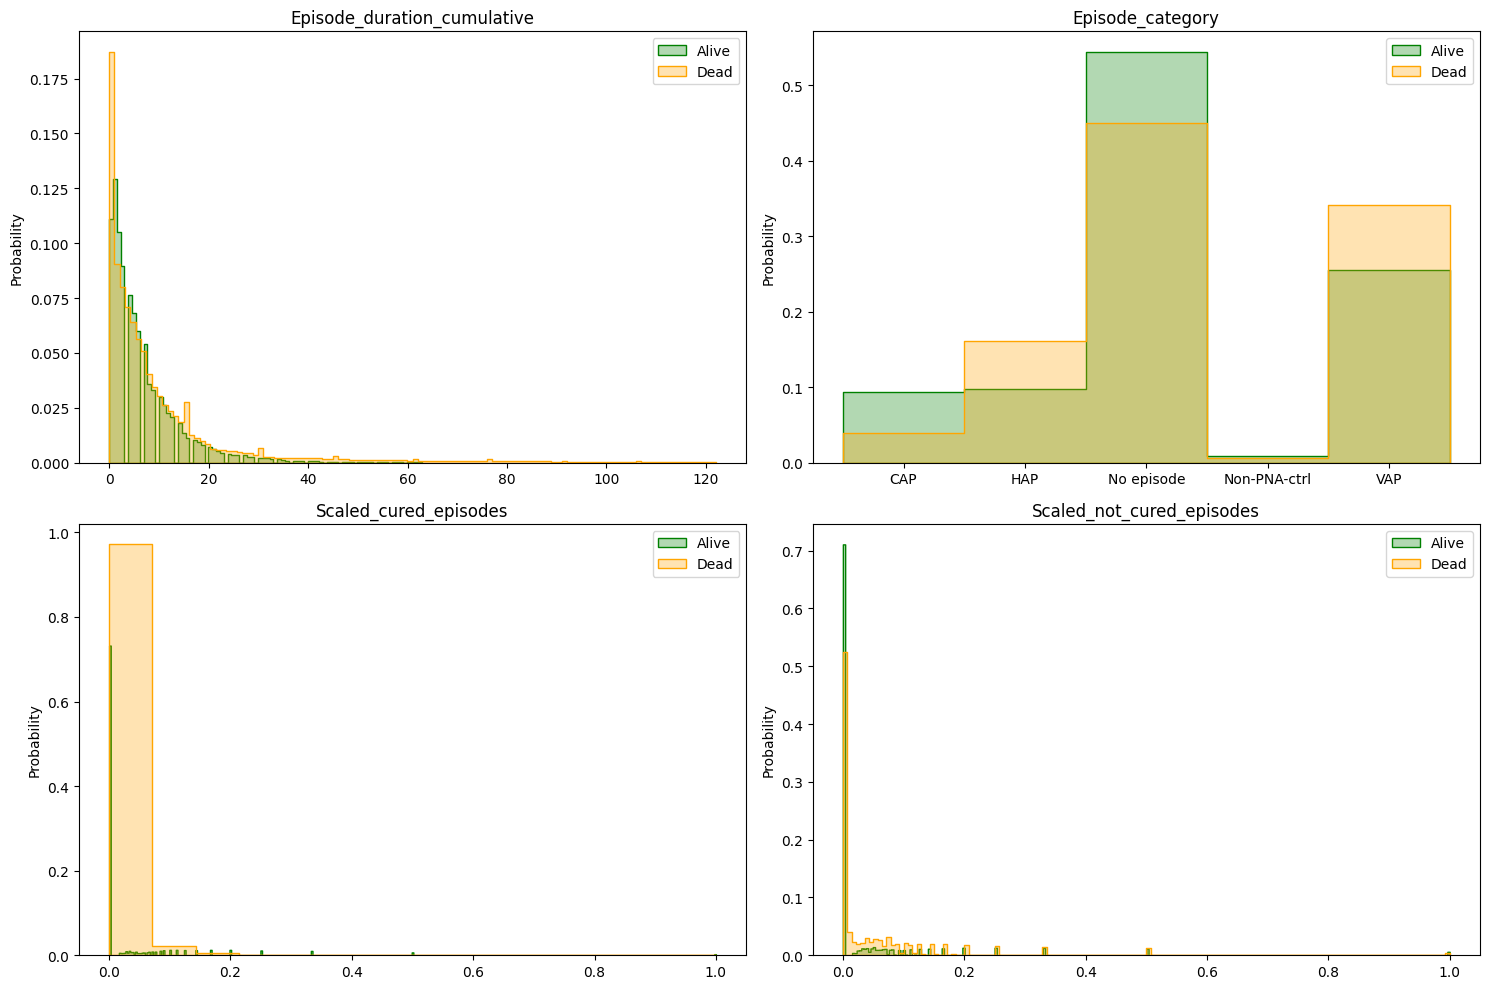

In [57]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

features = ['Episode_duration_cumulative', 'Episode_category', 'Scaled_cured_episodes', 'Scaled_not_cured_episodes']

for ax, feature in zip(axes.flat, features):
    sns.histplot(df[df['Binary_outcome'] == 0][feature], color="green", element="step", alpha=0.3, stat='probability', ax=ax)
    sns.histplot(df[df['Binary_outcome'] == 1][feature], color="orange", element="step", alpha=0.3, stat='probability', ax=ax)
    ax.legend(labels=['Alive', 'Dead'])
    ax.set_xlabel('')
    ax.set_title(feature)

plt.tight_layout()
plt.show()

### Cumulative_intubation_days
We use the same method to replace Cumulative intubation days with the actual cumulative values 

In [58]:
# Cumulative intubation days

df['Cumulative_intubation'] = np.zeros(len(df))

groups = df.groupby(['Patient_id', 'ICU_stay'])

for (id, stay), group in groups:
    global_index_start = group.index[0]  
    global_index_end = group.index[-1]  
    for loc_index, global_index in enumerate(group.index):
        global_index = global_index_start + loc_index  
        if loc_index != 0:

            if df.at[global_index, 'Intubation_flag'] == 1:
               df.at[global_index, 'Cumulative_intubation'] = (df.at[global_index - 1, 'Cumulative_intubation'] + 1) 
        else:
            if df.at[global_index, 'Intubation_flag'] == 0:
               df.at[global_index, 'Cumulative_intubation'] += 1

df['Cumulative_intubation']=df['Cumulative_intubation'].astype('int64')


### GCS_score
After an investigation, we found that 'GCS_eye_opening', 'GCS_motor_response' and 'GCS_verbal_response' can all be syntezised in a single variable. This variable is 'GCS_score' which is the sum of the 3 GCS variables and it explain the overall status of a patient. Specifically A score of 13 or higher correlates with mild brain injury, a score of 9 to 12 correlates with moderate injury, and a score of 8 or less represents severe brain injury

In [59]:
df['GCS_score'] = df['GCS_eye_opening'] + df['GCS_motor_response'] + df['GCS_verbal_response']

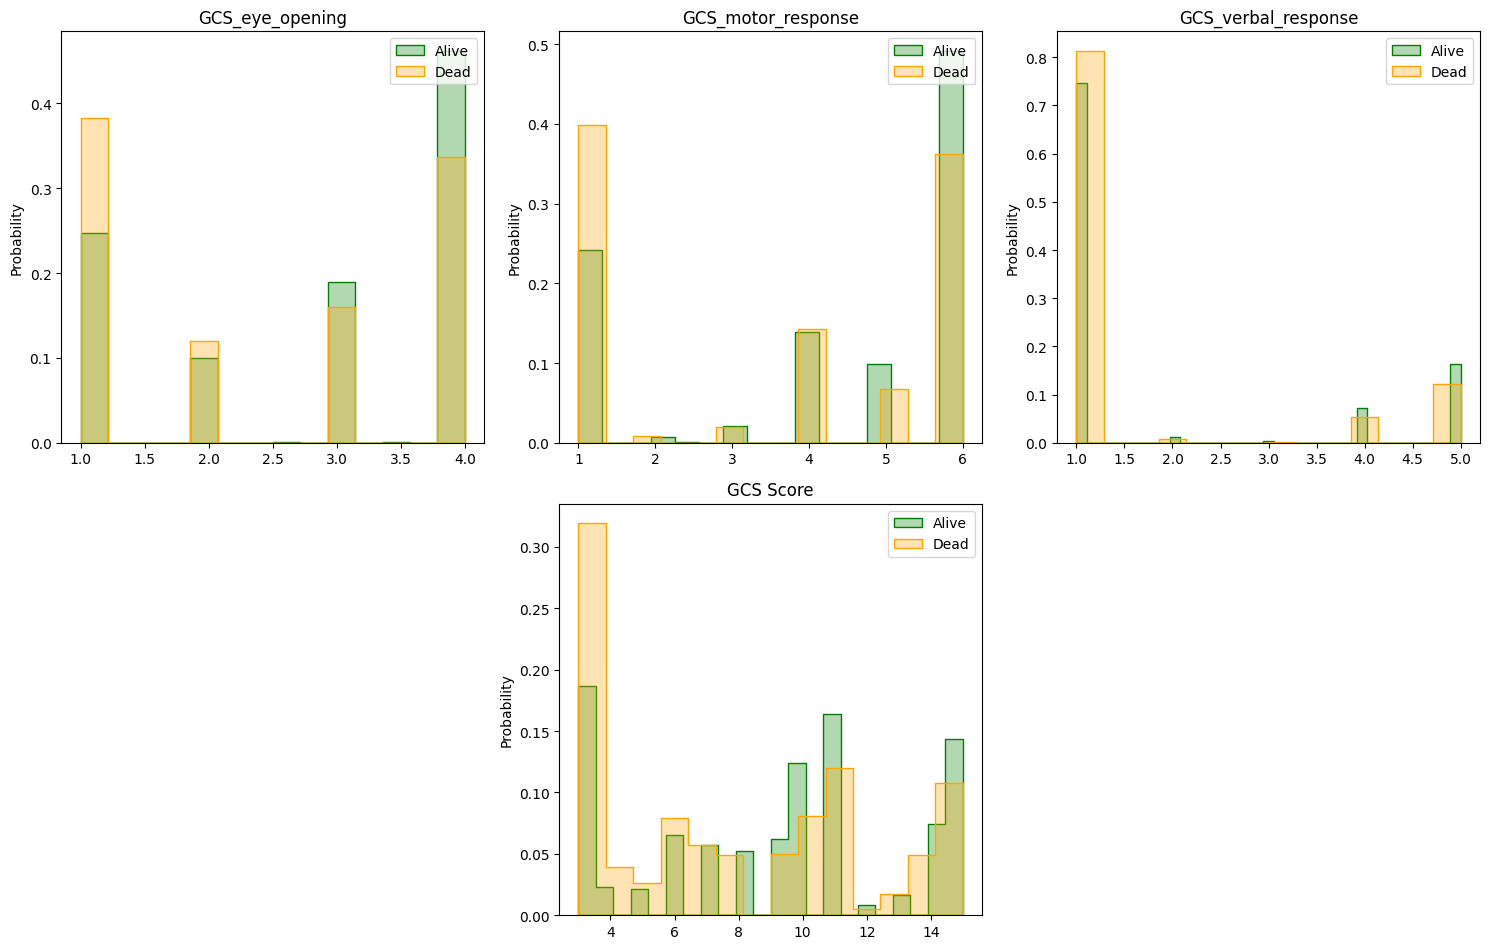

In [60]:
fig = plt.figure(figsize=(15, 10))
gs = fig.add_gridspec(2, 3)


ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])

ax4 = fig.add_subplot(gs[1, 1])

features = ['GCS_eye_opening', 'GCS_motor_response', 'GCS_verbal_response', 'GCS_score']

for ax, feature in zip([ax1, ax2, ax3], features):
    sns.histplot(df[df['Binary_outcome'] == 0][feature], color="green", element="step", alpha=0.3, stat='probability', ax=ax)
    sns.histplot(df[df['Binary_outcome'] == 1][feature], color="orange", element="step", alpha=0.3, stat='probability', ax=ax)
    ax.legend(labels=['Alive', 'Dead'])
    ax.set_xlabel('')
    ax.set_title(feature)  

sns.histplot(df[df['Binary_outcome'] == 0]['GCS_score'], color="green", element="step", alpha=0.3, stat='probability', ax=ax4)
sns.histplot(df[df['Binary_outcome'] == 1]['GCS_score'], color="orange", element="step", alpha=0.3, stat='probability', ax=ax4)
ax4.legend(labels=['Alive', 'Dead'])
ax4.set_xlabel('')
ax4.set_title('GCS Score')


plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [61]:
df.drop(['GCS_eye_opening', 'GCS_motor_response', 'GCS_verbal_response'], axis = 1, inplace = True)

### Goodbye NaNs
As already mentioned in the section "Correlation and Missing values", there are still some missing values due to the fact that certain patients in certain ICU stays did not have any value measured for some variables and the interpolation was not possible. We can now delete these groups (Patient_id - ICU_stay) from our study. 

In [62]:
nan_rows = df[df.isna().any(axis=1)]
 
nan_patient_icu = nan_rows[['Patient_id', 'ICU_stay']]
unique_nan_patient_icu = nan_patient_icu.drop_duplicates()
print('Groups that will be deleted from our study: ')
print(unique_nan_patient_icu.to_string(index=False))
print(unique_nan_patient_icu.shape)
print(nan_rows.shape)

Groups that will be deleted from our study: 
 Patient_id  ICU_stay
        263         2
        301         1
        301         3
        346         1
        393         2
        474         1
        474         2
        474         3
        493         1
        493         2
        497         1
        517         1
        576         1
        588         1
        588         2
        712         2
        812         1
        812         2
        914         2
        951         1
        970         1
       1008         1
       1008         2
       1095         1
       1174         1
       1245         1
       1270         2
       1379         1
       1404         1
       1404         2
       1500         1
       1614         2
       1702         3
       1702         4
       1705         1
       1720         1
       1720         3
       1810         1
       1998         1
       2040         2
       2040         3
       2040         4
       20

In [63]:
df.dropna(inplace = True)
print('Overall number of NaNs: ', df.isna().sum().sum())
print('Dimensions of the dataset: ', df.shape)

Overall number of NaNs:  0
Dimensions of the dataset:  (11249, 46)


### `Binary_outcome`

#### Fixing target variable
Taking into account that the objective of the project is to predict patient mortality for the next 24h, it is needed to fix the target variable.

#### Died only on last day

In our dataset, if a patient dies during their ICU stay, the target variable is marked as `True` for all time points throughout their ICU stay. This approach is incorrect because a patient only dies on the last day of their ICU stay.

To address this, we need to adjust the target variable such that it is `False` for all time points except for the last day. Essentially, we are shifting the binary outcome 24 hours into the future. This way, we accurately reflect the patient's status at each time point, setting `Binary_outcome` to `True` only on the day the prevoius day the patient actually dies.

In [64]:
def adjust_binary_outcome(group):
    if group['Binary_outcome'].sum() > 0: 
        max_day_index = group[group['Binary_outcome'] == 1]['ICU_day'].idxmax()
        group['Binary_outcome'] = 0  
        group.loc[max_day_index, 'Binary_outcome'] = 1  
    return group

# Apply the function to each group of Patient_id and ICU_stay
df = df.groupby(['Patient_id', 'ICU_stay'], group_keys=False).apply(adjust_binary_outcome)

# Reset the index if necessary
df.reset_index(drop=True, inplace=True)

We notice that the classes are very unbalanced now. 

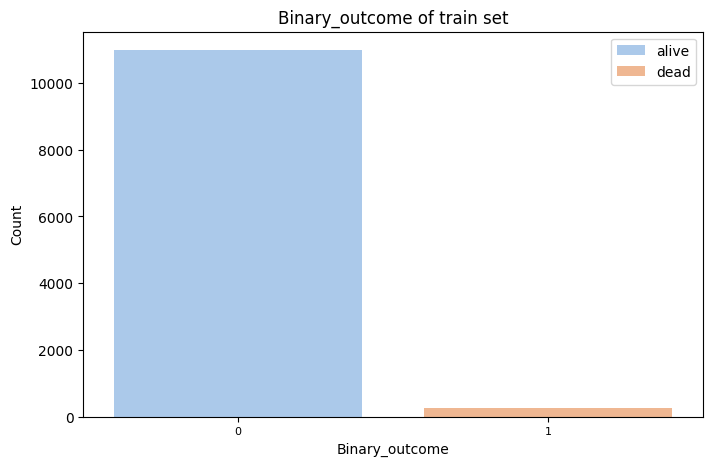

In [65]:
plt.figure(figsize=(8, 5))
sns.countplot(x = df['Binary_outcome'], palette = 'pastel')
plt.title('Binary_outcome of train set')
plt.ylabel('Count')
plt.xticks(fontsize=8)
plt.legend(labels=['alive', 'dead'])
plt.show()

### Dummy variables
Before proceeding with the implementation of the models we need to transform our categorical variables into dummies

#### `Patient_category`

In [66]:
# get_dummies for patient_category dropping not the first column but 'Non-PNA-ctrl'
df = pd.get_dummies(df, columns=['Patient_category'], prefix='Patient_category', dtype='uint8')
# drop patient category Non-PNA-ctrl
df.drop(['Patient_category_Non-Pneumonia Control'], axis = 1, inplace = True)

#### `Episode_category`

In [67]:
df = pd.get_dummies(df, columns=['Episode_category'], prefix='Episode_category', dtype='uint8')
df.drop(['Episode_category_No episode'], axis = 1, inplace = True)

#### `Gender`

In [68]:
df['Gender'] = df['Gender'].map({'Male':1, 'Female':0})
df['Gender']=df['Gender'].astype('category')

Finally our dataset is almost ready to be used for an accurate calssification


In [69]:
# update numerical and categorical columns
numerical = df.select_dtypes(include=['float64', 'int64']).columns
discrete = df.select_dtypes(include=['int64']).columns
categorical = df.select_dtypes(include=['category', 'bool']).columns

## Outliers detection
We are going to apply two different Black box algorithms for outlier detection: 
- Isolation Forest 
- DBSCAN

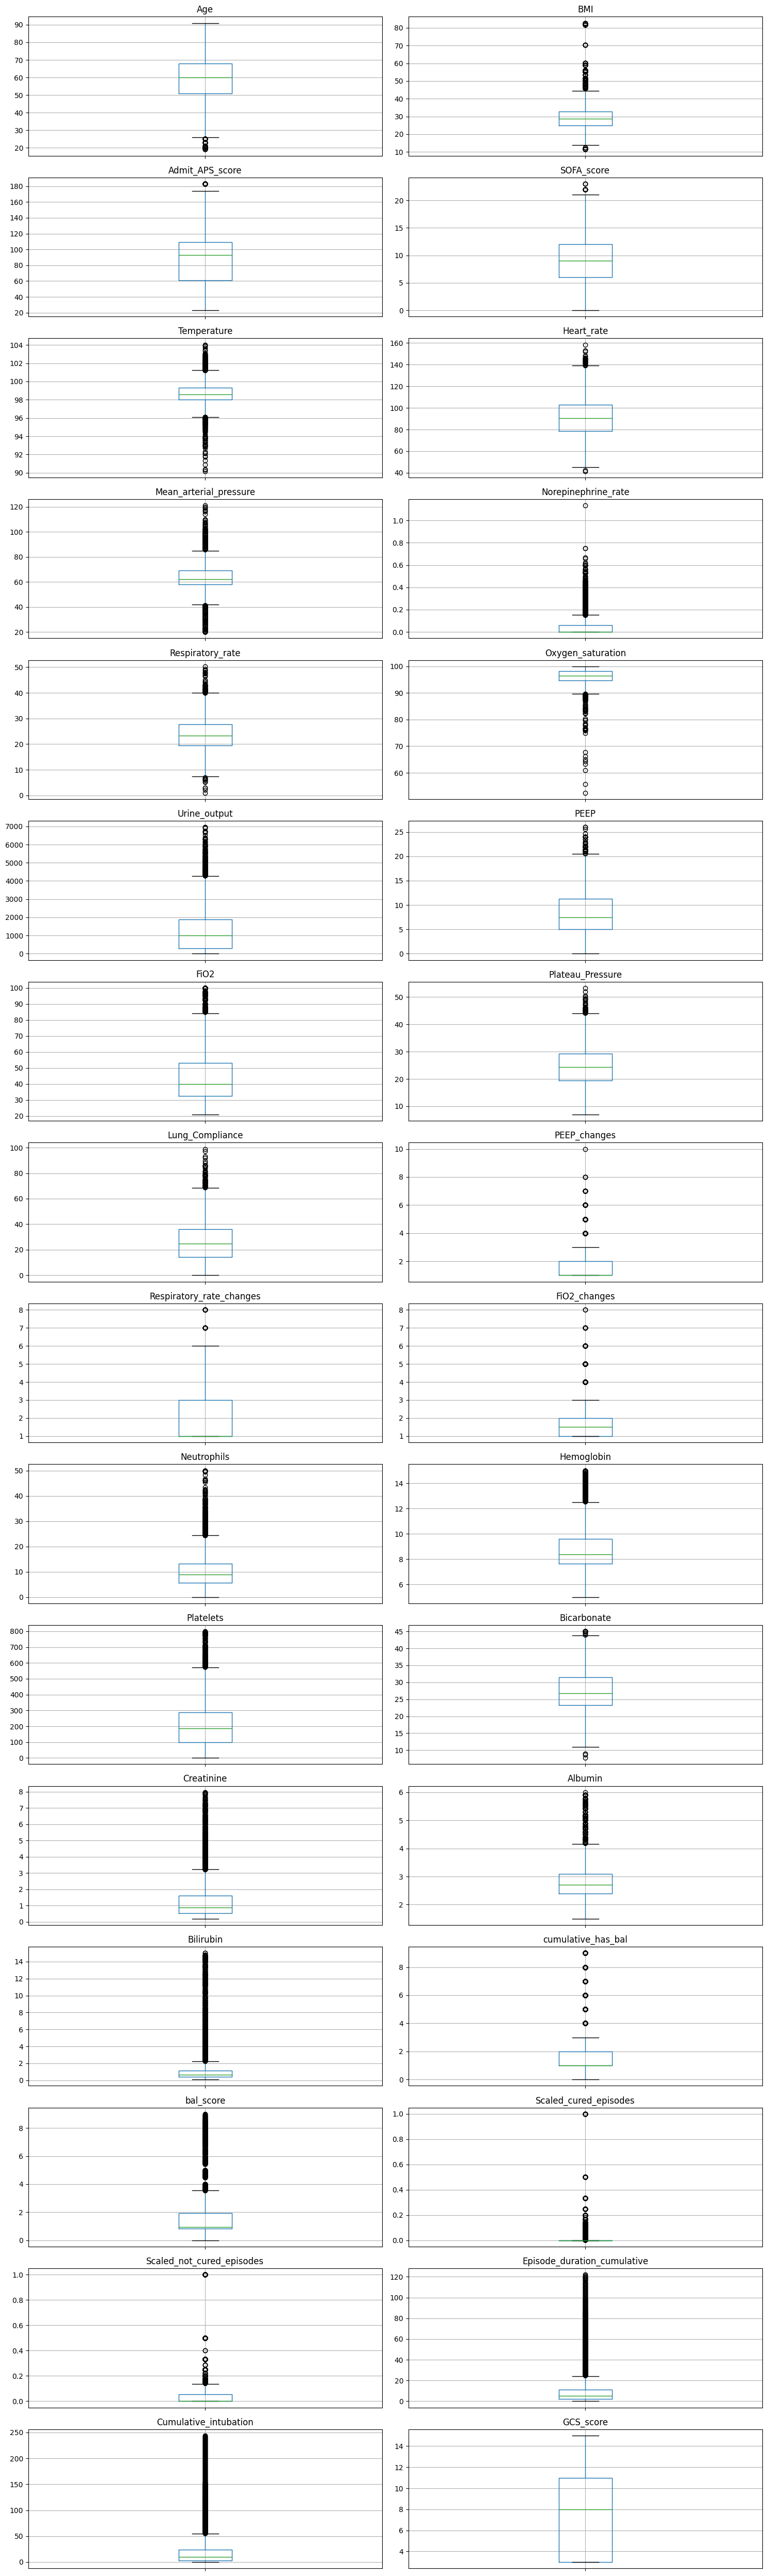

In [70]:
no_box = ['Patient_id', 'Binary_outcome', 'Number_of_ICU_stays', 'ICU_stay', 'ICU_day', 'Episode_duration']
boxplot_cols = [col for col in numerical if col not in no_box]

fig, axes = plt.subplots(nrows=16, ncols=2, figsize=(15, 50))

axes = axes.flatten()

for i, col in enumerate(boxplot_cols):
    df.boxplot(column=col, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].set_xticklabels([])

plt.tight_layout()
plt.show()

### Outlier detection: Isolation Forest

The contamination parameter provides an initial guess about the percentage of anomalies in the dataset. We apply this algorithm with the contamination parameter set to 0.1 to both reduce the data dimensionality and the class unbalance in Binary_outcome. 

In [71]:
# Initialize the Isolation Forest model
iso_forest = IsolationForest(contamination=0.1,  # Adjust contamination rate as needed
                             random_state=42,
                             n_jobs=-1)  # Use all available cores for computation

# Fit the model
iso_forest.fit(df)

# Predict anomalies
predictions_ISO = iso_forest.predict(df)

# Add predictions to the DataFrame
df['anomaly'] = predictions_ISO

# Number of anomalies detected
num_anomalies = (df['anomaly'] == -1).sum()
print(f'Number of anomalies detected: {num_anomalies}')

# Inspect anomalies
anomalies = df[df['anomaly'] == -1]
print(anomalies.head())
ISO_anomalies=df[df['anomaly'] == -1].index



Number of anomalies detected: 1125
    Patient_id  Binary_outcome  Age Gender    BMI  Admit_APS_score  \
0           43               0   72      0  29.67               60   
36          51               0   60      1  30.49               85   
61          51               0   60      1  30.49               85   
63          51               0   60      1  30.49               85   
64          51               0   60      1  30.49               85   

    Number_of_ICU_stays  Tracheostomy_flag  ICU_stay  ICU_day  ...  \
0                     1              False         1        1  ...   
36                    1               True         1       14  ...   
61                    1               True         1       39  ...   
63                    1               True         1       41  ...   
64                    1               True         1       42  ...   

    Cumulative_intubation  GCS_score  Patient_category_COVID-19  \
0                       0        6.0                    

The Isolation Forest is a black box method and, beacuse of that, it is difficult to interprate why they are considered outliers. We perform a PCA reduction in 2 dimension and try to visualize the differences between "normal" data ad anomalies. 

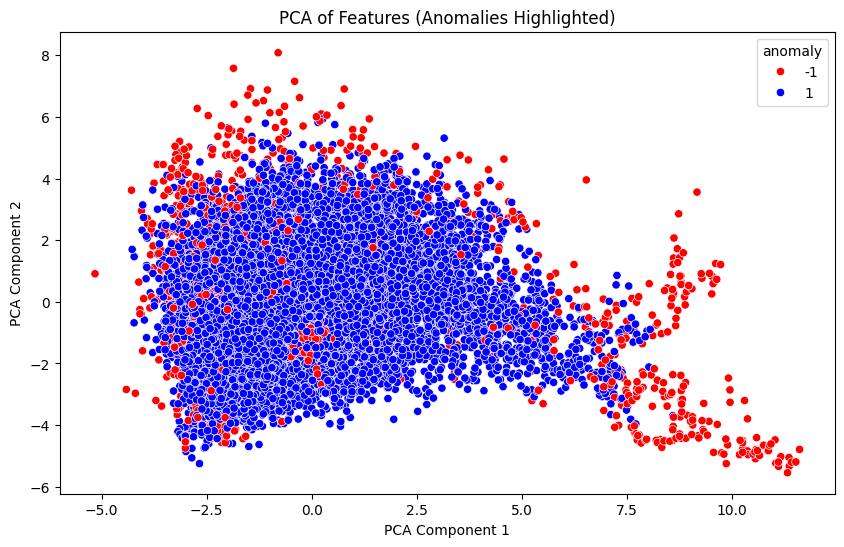

In [72]:
# PCA
df2 = df.drop(columns=['anomaly'])

# scale the data before performing PCA
scaler = StandardScaler()
df2_scaled = scaler.fit_transform(df2)

pca = PCA(n_components=2)  
pca_result = pca.fit_transform(df2_scaled)

df['pca_0'] = pca_result[:, 0]
df['pca_1'] = pca_result[:, 1]

# Plot PCA results
plt.figure(figsize=(10, 6))
scatter=sns.scatterplot(x='pca_0', y='pca_1',  hue='anomaly', palette={1: 'blue', -1: 'red'}, data=df)
plt.title('PCA of Features (Anomalies Highlighted)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [73]:
df.drop(columns=['anomaly'], axis=1,  inplace=True)

As we can see from the plot, the points that are further away from the rest are considered outliers.

### Outlier Detection: DBSCAN

This method is an unsupervised method for clustering. The labeling equal to -1 corresponds to the "noise points" that can be considered as anomalies. 
The issue here is that the result is too much hyperparameters' sensible, as shown in the example below. 
Keep in mind that: 
- epsfloat, default=0.5. 
The maximum distance between two samples for one to be considered as in the neighborhood of the othe
- min_samplesint, default=5. 
The number of samples (or total weight) in a neighborhood for a point to be considered as a core point  This includes the point itself. If min_samples is set to a higher value, DBSCAN will find denser clusters, whereas if it is set to a lower value, the found clusters will be more sparse.

We manually tune the hyperparameters in order to detect a number of outlier similar to the number founded by the IsolationForest to compare the results. 

In [74]:
# dbscan
dbscan = DBSCAN(eps=150, min_samples=5, n_jobs=-1)  
dbscan.fit(df)

# Add the cluster labels to the DataFrame
df['cluster'] = dbscan.labels_
print((df['cluster']==-1).sum())
#dbscan=(df['cluster']==-1).index
dbscan = df.index[df['cluster'] == -1].tolist()
dbscan

1426


[0,
 8,
 10,
 11,
 12,
 17,
 24,
 71,
 77,
 81,
 82,
 85,
 94,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 134,
 135,
 137,
 138,
 151,
 152,
 153,
 189,
 190,
 192,
 241,
 242,
 243,
 244,
 302,
 333,
 345,
 346,
 401,
 403,
 404,
 405,
 406,
 409,
 411,
 430,
 433,
 449,
 450,
 451,
 508,
 513,
 514,
 516,
 518,
 519,
 522,
 523,
 526,
 542,
 543,
 546,
 547,
 548,
 549,
 550,
 551,
 552,
 553,
 554,
 555,
 556,
 557,
 558,
 559,
 560,
 568,
 569,
 571,
 573,
 575,
 581,
 586,
 587,
 589,
 591,
 596,
 615,
 638,
 651,
 652,
 653,
 654,
 655,
 665,
 674,
 675,
 676,
 707,
 708,
 728,
 729,
 760,
 763,
 764,
 766,
 771,
 776,
 780,
 817,
 818,
 819,
 820,
 821,
 826,
 850,
 851,
 888,
 896,
 903,
 905,
 947,
 948,
 949,
 950,
 951,
 952,
 953,
 954,
 957,
 958,
 959,
 960,
 961,
 964,
 976,
 985,
 988,
 989,
 990,
 991,
 992,
 995,
 996,
 998,
 1000,
 1003,
 1006,
 1008,
 1009,
 1016,
 1025,
 1028,

### Compare the outlier detected with different methods

We now consider outliers the points detected by both the algorithms as a double check. Keeping in mind that the number of observation with binary_outcome equal to 1 is very small with respect to the other class, we drop from the dataset only the observations wich are considered outliers by both methods and have binary_outcome equal to 0.

In [75]:
common_elements = set(ISO_anomalies).intersection(dbscan)
print('The number of common outlier is ', len(common_elements))

The number of common outlier is  115


We believed that the size of the intersection (115 data points) was too small since we wanted to reduced dimensionality. Hence, we decided to only keep the Isolation Forest algorithm as our outlier detection method

In [76]:
filtered_indices = [i for i in list(set(ISO_anomalies)) if df.loc[i, 'Binary_outcome'] == 0]
print('Number of outliers with binary_outcome = 0: ', len(filtered_indices))

Number of outliers with binary_outcome = 0:  985


In [77]:
df= df.drop(index=filtered_indices)
df.drop('cluster', axis=1, inplace=True)
print(df.shape)

(10264, 53)


## Saving final dataset (for online learning)

In [78]:
#df.to_csv('final_dataset.csv', index=False)

## Preparing to training

### Train and test splitting

In [79]:
X = df.drop(['Binary_outcome','Patient_id'], axis = 1)
y = df['Binary_outcome']

# stratify guarantees the same distribution of classes in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


Standardize the numerical variables

In [80]:
numerical = X.select_dtypes(include=['float64', 'int64']).columns
categorical = X.select_dtypes(include=['category', 'bool']).columns

In [81]:
scaler = StandardScaler()

X_train[numerical] = scaler.fit_transform(X_train[numerical])
X_test[numerical] = scaler.transform(X_test[numerical])


### Class unbalance
The goal of the project is to predict the binary_outcome for each observation, meaning that we are trying to predict the death of a patient in the next 24 hours. The binary_outcome is 1 if the patient is dead, 0 otherwise. As already pointed out before, the unbalance of the classes could cause issue and mispredict the unpopular class. 

There are two principal way to deal with this issue: 
- SMOTE (Synthetic Minority Over-sampling Technique): it works by generating synthetic samples for the minority class to balance the dataset. In particular, a new instance is obtained as a convex combination of a random instance of the minority class and one of its the k-nearest neighborohood of the same class.
- Class weighting: it assigns higher weights to the minority class and lower weights to the majority class in the loss function. These weights are usually inversely proportional to the class frequencies, so the minority class gets a higher weight, such that in the loss function the errors (misclassifications) on the minority class are penalized more heavily than errors on the majority class.

#### SMOTE
As a first trial, we used the SMOTE method to generate samples with Binary_outcome = 1. However 6995-185 = 6810 samples with Binary_outcome = 0 are created to obtain a balance training dataset. This method adds too much noise in the data and the successive models performances are poor. 

In [82]:
oversample = SMOTE(random_state=42)
X_ov, y_ov = oversample.fit_resample(X_train, y_train)
oversample.get_params()

{'k_neighbors': 5,
 'n_jobs': None,
 'random_state': 42,
 'sampling_strategy': 'auto'}

In [83]:
Counter(y_train)

Counter({0: 6999, 1: 185})

In [84]:
Counter(y_ov)

Counter({0: 6999, 1: 6999})

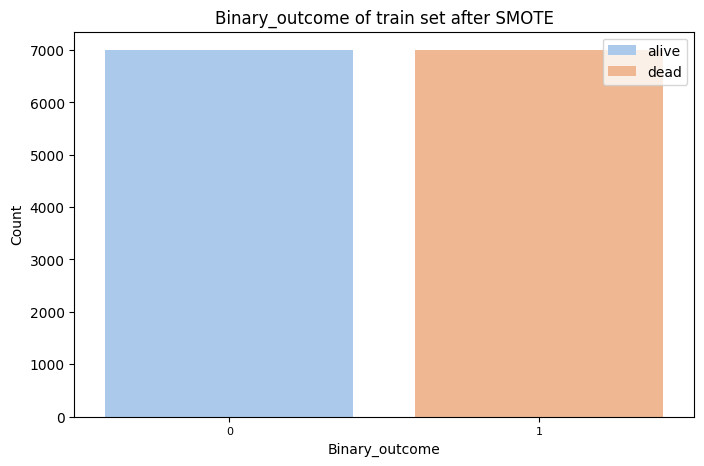

In [85]:
plt.figure(figsize=(8, 5))
sns.countplot(x = y_ov, palette = 'pastel')
plt.title('Binary_outcome of train set after SMOTE')
plt.ylabel('Count')
plt.xticks(fontsize=8)
plt.legend(labels=['alive', 'dead'])
plt.show()

#### Class weighting 
At the end we observe that this is the most efficient method in terms of sempliciity of implementation and results of the models. The function used below compute class weights as inversely proportional to the prevalence in the training set. 

In [86]:
# Compute class weights

class_weights = class_weight.compute_class_weight(class_weight='balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)
class_weights = dict(zip(np.unique(y_train), class_weights))
class_weights

{0: 0.5132161737391056, 1: 19.416216216216217}

### Feature selection 

The training data contains 53 features and 10258 instances. To encounter the dimensions of the dataset, we select a subset of feature by their importance using the Random Forest algorithm. 

This method is effective because Random Forests are capable of handling complex datasets with diverse features and capturing non-linear relationships. During training, Random Forest calculates the importance of each feature based on how much it contributes to reducing prediction errors across all decision trees in the forest. Features that consistently lead to greater reductions in prediction errors are considered more important. After training, features are ranked by their importance scores, and you can select the top-ranked features based on a threshold or use all features above a certain importance level. 

In [87]:
df.shape

(10264, 53)

In [88]:
rf_selector = SelectFromModel(
    RandomForestClassifier(
        criterion='entropy',
        max_depth=15,
        n_estimators=300,
        random_state=42,
        class_weight=class_weights
    ),
    max_features=50
)

rf_selector.fit(X_train, y_train)
selected_feature_indices_rf = rf_selector.get_support(indices=True)
selected_feature_names_rf = [X_train.columns[index] for index in selected_feature_indices_rf]

print(f'Selected {len(selected_feature_names_rf)} features:')
selected_feature_names_rf

Selected 23 features:


['Age',
 'ICU_day',
 'SOFA_score',
 'Temperature',
 'Heart_rate',
 'Mean_arterial_pressure',
 'Norepinephrine_rate',
 'Respiratory_rate',
 'Oxygen_saturation',
 'Urine_output',
 'FiO2',
 'Hemoglobin',
 'Platelets',
 'Bicarbonate',
 'Creatinine',
 'Bilirubin',
 'bal_score',
 'Scaled_not_cured_episodes',
 'Episode_duration_cumulative',
 'Cumulative_intubation',
 'GCS_score',
 'pca_0',
 'pca_1']

We also believe in the importance of the number of cured episodes; morever, the literature suggests the importance of the VAP episode in the pneumonia disease. We add these two features to the ones selected with the Fetaure - Importance criterium of the RandomForest. 

In [89]:
selected_feature_names_rf = selected_feature_names_rf + ['Scaled_cured_episodes','Episode_category_VAP']
X_train = X_train[selected_feature_names_rf]
X_test = X_test[selected_feature_names_rf]

## Models Implementation

To assess which model is the best, we focus on the AUC score and the recall score; indeed in a medical field is better to have the lowest number of false negative (i.e. false alive) as possible. 
The function below has been implemented to do the following steps, given as input a choosen classifier: 
- 3-cross-validation to find the optimal hyperparameters with respect to the recall score
- Train the model with the optimal hyperparameters
- Save scores

In [90]:
# Function for hyperparameter search and evaluation
def hyperp_search(classifier, parameters, X_train, y_train, X_test, y_test):
    gs = GridSearchCV(classifier, parameters, cv=3, scoring='recall', verbose=0, n_jobs=-1)
    gs = gs.fit(X_train, y_train)
    
    best_model = gs.best_estimator_
    best_param = gs.best_params_
    y_pred = best_model.predict(X_test)
    y_pred_train = best_model.predict(X_train)
    
    recall_train = recall_score(y_train, y_pred_train)
    recall_test = recall_score(y_test, y_pred)
    
    print(f"{'-'*40}")
    print(f"Classifier: {classifier}")
    print(f"Best Parameters: {best_param}")
    print(f"{'-'*40}")
    print(f"Recall (Train): {recall_train:.3f}")
    print(f"Recall (Test): {recall_test:.3f}")
    print(f"{'-'*40}")

    return best_model, best_param, recall_train, recall_test, y_test, y_pred

# ROC
def roc(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_probs = model.predict_proba(X_test)  
    fpr, tpr, _ = metrics.roc_curve(y_test, y_probs[:, 1])
    auc = metrics.roc_auc_score(y_test, y_probs[:, 1])
    
    print(f"{'-'*40}")
    print(f"AUC: {auc:.2f}")
    print(f"{'-'*40}")
    
    return auc, fpr, tpr

# Total evaluation on the model
def total(classifier, parameters, X_train, y_train, X_test, y_test):
    best_model, best_param, recall_train, recall_test, y_test, y_pred = hyperp_search(classifier, parameters, X_train, y_train, X_test, y_test)
    auc, fpr, tpr = roc(best_model, X_train, y_train, X_test, y_test)
    return auc, fpr, tpr, best_model, best_param, recall_train, recall_test, y_test, y_pred

In the following steps, we are going to test the models ad recap the result at the end. 

In [91]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier()

parameters = {'n_neighbors':np.arange(2,8,13),'weights':['uniform','distance'],'metric':['manhattan','euclidean']}

auc_KNN,fpr_KNN, tpr_KNN,best_model_KNN,best_param_KNN, recall_train_KNN, recall_test_KNN, y_test_KNN, y_pred_KNN=total(classifier,parameters,X_train,y_train,X_test,y_test)

----------------------------------------
Classifier: KNeighborsClassifier()
Best Parameters: {'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'distance'}
----------------------------------------
Recall (Train): 1.000
Recall (Test): 0.215
----------------------------------------
----------------------------------------
AUC: 0.62
----------------------------------------


In [92]:
# Tree
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()

parameters = {'criterion': ['entropy','gini'], 
              'max_depth': [4,5,6,7,8,9,10,11],
              'min_samples_split': [16,17,18,19,20,21],
              'min_samples_leaf': [3,4,5,6,7,8],
              'class_weight': [class_weights]}

auc_tree,fpr_tree, tpr_tree,best_model_tree,best_param_tree, recall_train_tree, recall_test_tree, y_test_tree, y_pred_tree = total(classifier,parameters,X_train,y_train,X_test,y_test)

----------------------------------------
Classifier: DecisionTreeClassifier()
Best Parameters: {'class_weight': {0: 0.5132161737391056, 1: 19.416216216216217}, 'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 20}
----------------------------------------
Recall (Train): 0.778
Recall (Test): 0.608
----------------------------------------
----------------------------------------
AUC: 0.80
----------------------------------------


In [93]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier()

parameters = {'n_estimators' : [19,20,21,22,23],
    'criterion' : ['gini'],
             'max_depth' : [4,5,6,7,8,9,10], 
             'min_samples_split' : [2,3,4],
              'min_samples_leaf' : [4,5,6],
              'class_weight': [class_weights]
             }

auc_RandFor, fpr_RandFor, tpr_RandFor, best_model_RandFor, best_param_RandFor, recall_train_RandFor, recall_test_RandFor, y_test_RandFor, y_pred_RandFor = total(classifier,parameters,X_train,y_train,X_test,y_test)

----------------------------------------
Classifier: RandomForestClassifier()
Best Parameters: {'class_weight': {0: 0.5132161737391056, 1: 19.416216216216217}, 'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 22}
----------------------------------------
Recall (Train): 0.762
Recall (Test): 0.671
----------------------------------------
----------------------------------------
AUC: 0.94
----------------------------------------


In [94]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB #or alternative NB implementations

model_NB = GaussianNB()

auc_NB, fpr_NB, tpr_NB, best_model_NB, best_param_NB, recall_train_NB, recall_test_NB, y_test_NB, y_pred_NB =total(classifier,{},X_train,y_train,X_test,y_test)

----------------------------------------
Classifier: RandomForestClassifier()
Best Parameters: {}
----------------------------------------
Recall (Train): 1.000
Recall (Test): 0.316
----------------------------------------
----------------------------------------
AUC: 0.93
----------------------------------------


In [95]:
# Logistic

from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()

parameters = {"C":[1e-4,1e-3,1e-2,1e-1,1,10], 
              "max_iter":[600,700,800,900],
              "class_weight":[class_weights]}


auc_LR, fpr_LR, tpr_LR, best_model_LR, best_param_LR, recall_train_LR, recall_test_LR, y_test_LR, y_pred_LR = total(classifier,parameters,X_train,y_train,X_test,y_test)

----------------------------------------
Classifier: LogisticRegression()
Best Parameters: {'C': 0.1, 'class_weight': {0: 0.5132161737391056, 1: 19.416216216216217}, 'max_iter': 600}
----------------------------------------
Recall (Train): 0.827
Recall (Test): 0.823
----------------------------------------
----------------------------------------
AUC: 0.91
----------------------------------------


In [96]:
# SVM

from sklearn.svm import SVC

classifier = SVC()

parameters = {"kernel":['rbf'],
              "C":[0.1,0.5,1],
              "probability":[True],
              "class_weight":[class_weights]}

auc_SVM, fpr_SVM, tpr_SVM, best_model_SVM, best_param_SVM, recall_train_SVM, recall_test_SVM, y_test_SVM, y_pred_SVM = total(classifier,parameters,X_train,y_train,X_test,y_test)

----------------------------------------
Classifier: SVC()
Best Parameters: {'C': 0.1, 'class_weight': {0: 0.5132161737391056, 1: 19.416216216216217}, 'kernel': 'rbf', 'probability': True}
----------------------------------------
Recall (Train): 0.962
Recall (Test): 0.835
----------------------------------------
----------------------------------------
AUC: 0.93
----------------------------------------


In [97]:
# Multi-layer Perceptron classifier

from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier()

parameters = {"hidden_layer_sizes":[(100,20,5),(150,50,10)],
              "max_iter": [1000,2000,3000,3500],
              "alpha": [0.05,0.1,0.2,0.3],
              "learning_rate":['adaptive']}

auc_MLP, fpr_MLP, tpr_MLP, best_model_MLP, best_param_MLP, recall_train_MLP, recall_test_MLP, y_test_MLP, y_pred_MLP = total(classifier,parameters,X_train,y_train,X_test,y_test)

----------------------------------------
Classifier: MLPClassifier()
Best Parameters: {'alpha': 0.05, 'hidden_layer_sizes': (100, 20, 5), 'learning_rate': 'adaptive', 'max_iter': 3000}
----------------------------------------
Recall (Train): 0.951
Recall (Test): 0.456
----------------------------------------
----------------------------------------
AUC: 0.92
----------------------------------------


In [98]:
# Gradient Boosting

from sklearn.ensemble import GradientBoostingClassifier 

classifier = GradientBoostingClassifier()

parameters = {'loss':['log_loss'],
              'criterion':['friedman_mse','squared_error'],
              'learning_rate':[1.1,1,0.9,0.8,1.2,1.3],
              'n_estimators':[53,54,55,56,70]}

auc_GB, fpr_GB, tpr_GB, best_model_GB, best_param_GB, recall_train_GB, recall_test_GB, y_test_GB, y_pred_GB = total(classifier,parameters,X_train,y_train,X_test,y_test)

----------------------------------------
Classifier: GradientBoostingClassifier()
Best Parameters: {'criterion': 'friedman_mse', 'learning_rate': 0.9, 'loss': 'log_loss', 'n_estimators': 54}
----------------------------------------
Recall (Train): 0.519
Recall (Test): 0.342
----------------------------------------
----------------------------------------
AUC: 0.78
----------------------------------------


In [99]:
# Bagging with tree
from sklearn.ensemble import BaggingClassifier

classifier = BaggingClassifier()
base = DecisionTreeClassifier(criterion='gini', max_depth=7, min_samples_leaf=5, min_samples_split=17, class_weight=class_weights)

parameters = {'n_estimators':[4,5,6,7,8,9],
              'estimator':[base],
              'random_state':[2]}

auc_Bagtree, fpr_Bagtree, tpr_Bagtree, best_model_Bagtree, best_param_Bagtree, recall_train_Bagtree, recall_test_Bagtree, y_test_Bagtree, y_pred_Bagtree = total(classifier,parameters,X_train,y_train,X_test,y_test)


----------------------------------------
Classifier: BaggingClassifier()
Best Parameters: {'estimator': DecisionTreeClassifier(class_weight={0: 0.5132161737391056,
                                     1: 19.416216216216217},
                       max_depth=7, min_samples_leaf=5, min_samples_split=17), 'n_estimators': 5, 'random_state': 2}
----------------------------------------
Recall (Train): 0.876
Recall (Test): 0.557
----------------------------------------
----------------------------------------
AUC: 0.85
----------------------------------------


In [100]:
from sklearn.ensemble import AdaBoostClassifier

# AdaBoost with tree
classifier = AdaBoostClassifier()
base = DecisionTreeClassifier(criterion='gini', max_depth=7, min_samples_leaf=5, min_samples_split=17, class_weight=class_weights)

parameters = {'n_estimators':[4,6,7,8,9,10,11],
              'estimator':[base], 
              'learning_rate' :[0.5,0.6,0.7,0.8,0.9,1],
              'random_state':[2],
              'algorithm':['SAMME']}

auc_Adatree, fpr_Adatree, tpr_Adatree, best_model_Adatree, best_param_Adatree, recall_train_Adatree, recall_test_Adatree, y_test_Adatree, y_pred_Adatree = total(classifier,parameters,X_train,y_train,X_test,y_test)

----------------------------------------
Classifier: AdaBoostClassifier()
Best Parameters: {'algorithm': 'SAMME', 'estimator': DecisionTreeClassifier(class_weight={0: 0.5132161737391056,
                                     1: 19.416216216216217},
                       max_depth=7, min_samples_leaf=5, min_samples_split=17), 'learning_rate': 0.5, 'n_estimators': 4, 'random_state': 2}
----------------------------------------
Recall (Train): 0.995
Recall (Test): 0.519
----------------------------------------
----------------------------------------
AUC: 0.86
----------------------------------------


### Overall Results

In this section, we provide a summary of the results to compare the models

In [101]:
recall_train_values = [recall_train_tree, recall_train_RandFor, recall_train_LR, recall_train_SVM, recall_train_MLP, recall_train_GB, recall_train_KNN, recall_train_NB, recall_train_Bagtree, recall_train_Adatree]
recall_test_values = [recall_test_tree, recall_test_RandFor, recall_test_LR, recall_test_SVM, recall_test_MLP, recall_test_GB, recall_test_KNN, recall_test_NB, recall_test_Bagtree, recall_test_Adatree]
auc_values = [auc_tree, auc_RandFor, auc_LR, auc_SVM, auc_MLP, auc_GB, auc_KNN, auc_NB, auc_Bagtree, auc_Adatree]

df_results = pd.DataFrame({'Model': ['Decision Tree', 'Random Forest', 'Logistic Regression', 'SVM', 'MLP', 'Gradient Boosting', 'KNN', 'Naive Bayes', 'Bagging with Tree', 'AdaBoost with Tree'],
                            'Recall_train': recall_train_values,
                            'Recall_test': recall_test_values,
                            'AUC': auc_values})

df_results

,Model,Recall_train,Recall_test,AUC
0,Decision Tree,0.778378,0.607595,0.795912
1,Random Forest,0.762162,0.670886,0.936087
2,Logistic Regression,0.827027,0.822785,0.911574
3,SVM,0.962162,0.835443,0.929494
4,MLP,0.951351,0.455696,0.924477
5,Gradient Boosting,0.518919,0.341772,0.778669
6,KNN,1.000000,0.215190,0.624345
7,Naive Bayes,1.000000,0.316456,0.928431
8,Bagging with Tree,0.875676,0.556962,0.853083
9,AdaBoost with Tree,0.994595,0.518987,0.855698


We consider the best models the ones which have a high Recall_test and AUC. At the top, we find: 
- SVM
- Logistic Regression
- Random Forest


More in details, for each model we show:
- confusion matrices
- recall on train and test to see if models are overfitting
- AUC
- ROC curves.

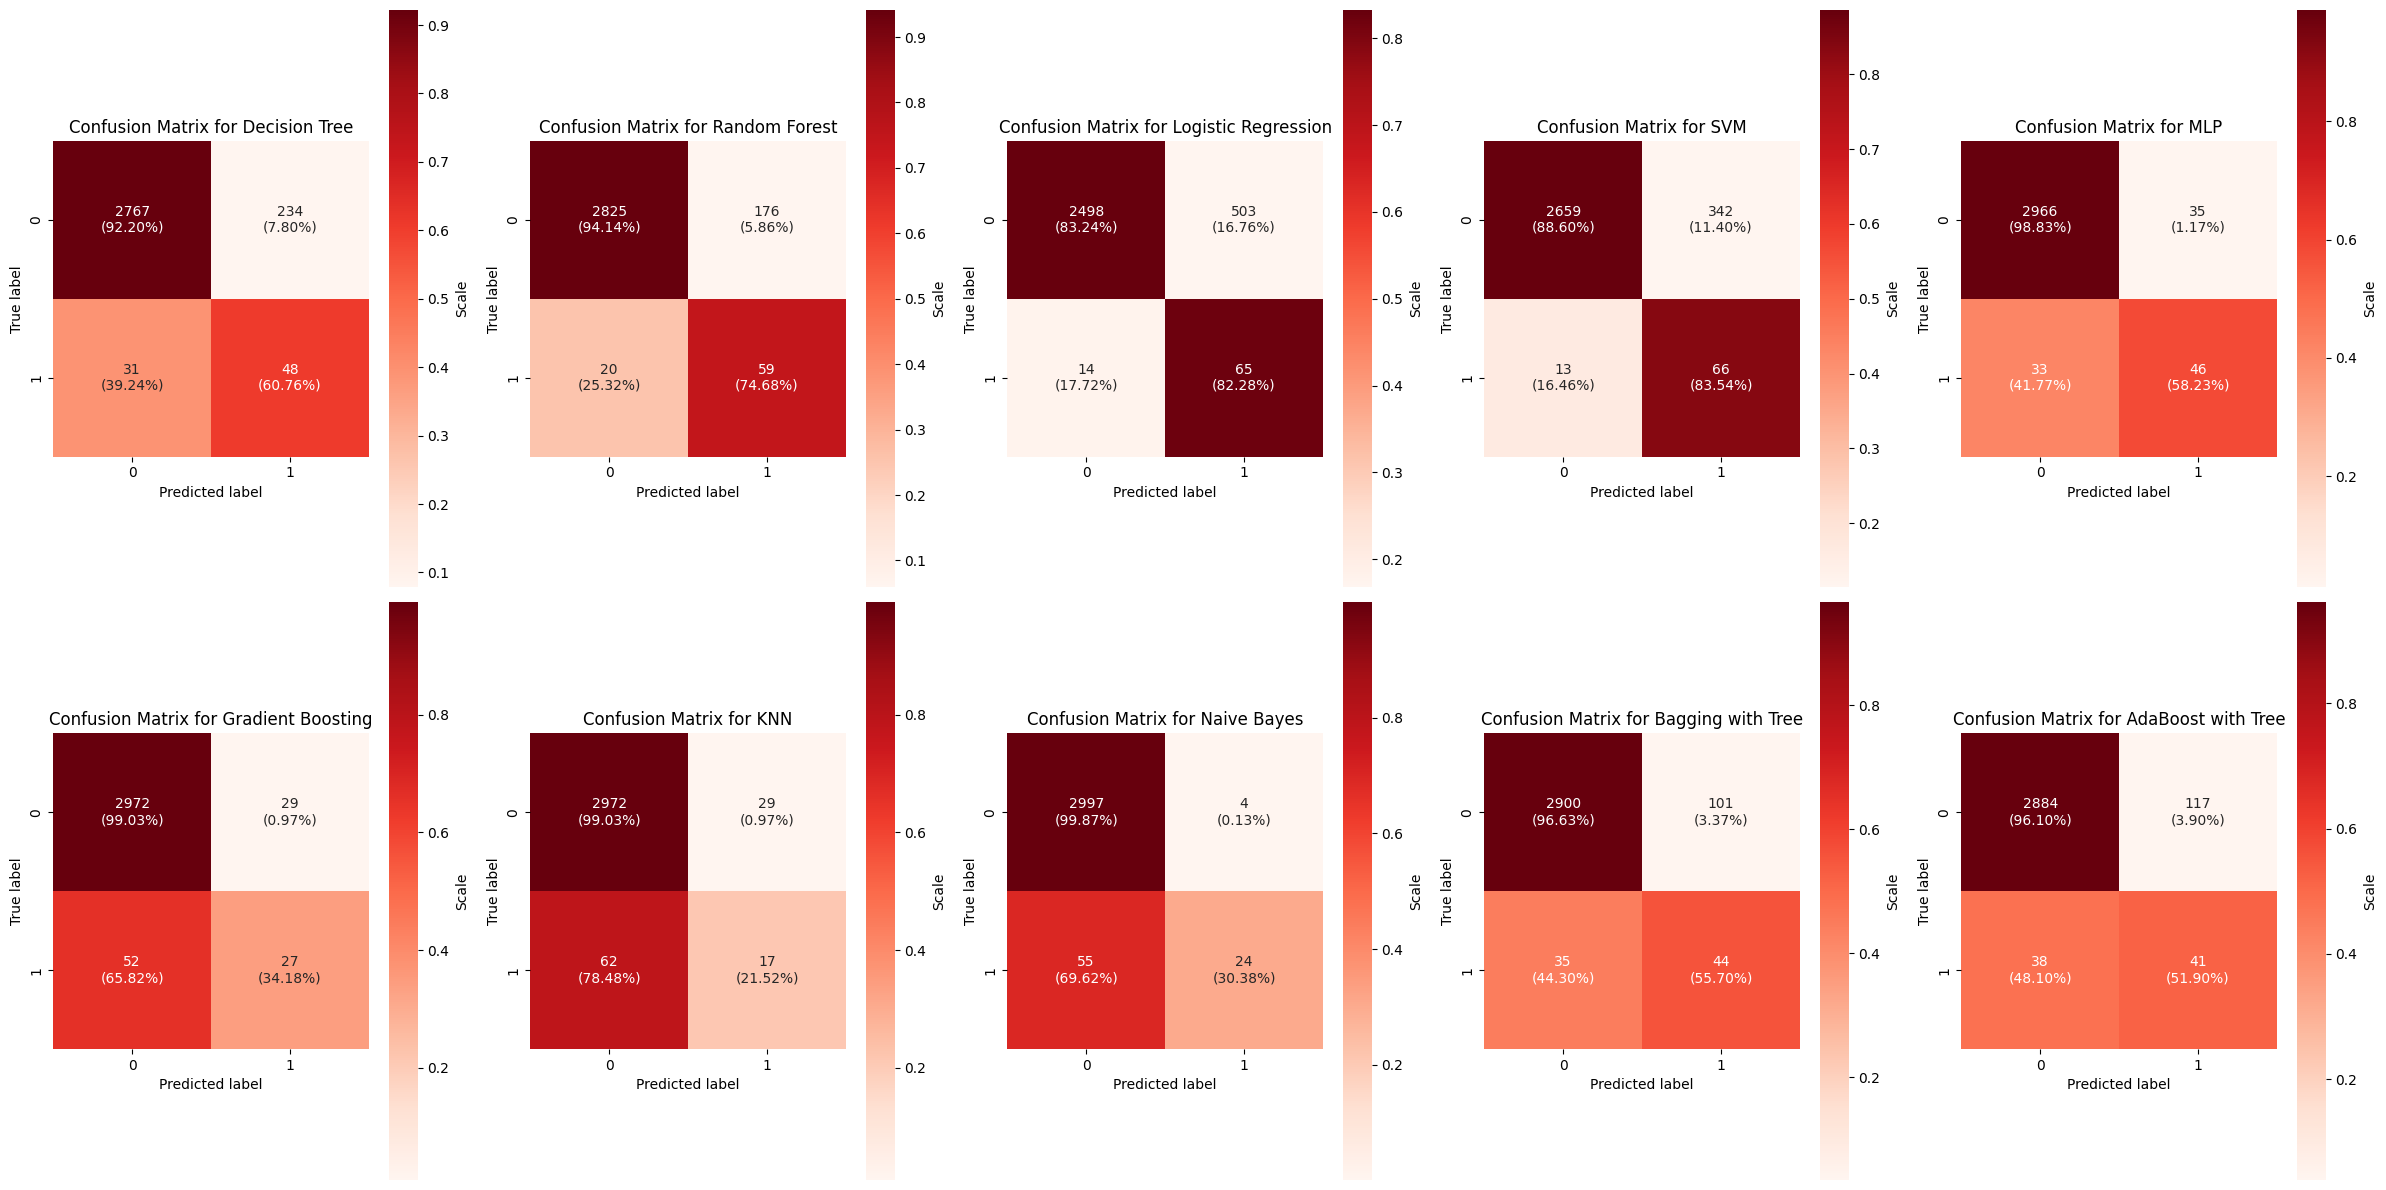

In [102]:
# confusion matrix
model_names = [
    "Decision Tree", "Random Forest", "Logistic Regression", "SVM", "MLP",
    "Gradient Boosting", "KNN", "Naive Bayes", "Bagging with Tree", "AdaBoost with Tree"
]

best_models = [
    best_model_tree, best_model_RandFor, best_model_LR, best_model_SVM, best_model_MLP, 
    best_model_GB, best_model_KNN, best_model_NB, best_model_Bagtree, best_model_Adatree
]

# Plot all confusion matrices in one figure
fig, axs = plt.subplots(2, 5, figsize=(24, 12))

for idx, (model, model_name) in enumerate(zip(best_models, model_names)):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_norm[i, j] * 100
            s = f"{c}\n({p:.2f}%)"
            annot[i, j] = s
    sns.heatmap(cm_norm, annot=annot, fmt='', cmap='Reds', cbar_kws={'label': 'Scale'}, ax=axs[idx//5, idx%5], square=True)
    axs[idx//5, idx%5].set_title(f'Confusion Matrix for {model_name}')
    axs[idx//5, idx%5].set_xlabel('Predicted label')
    axs[idx//5, idx%5].set_ylabel('True label')

plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


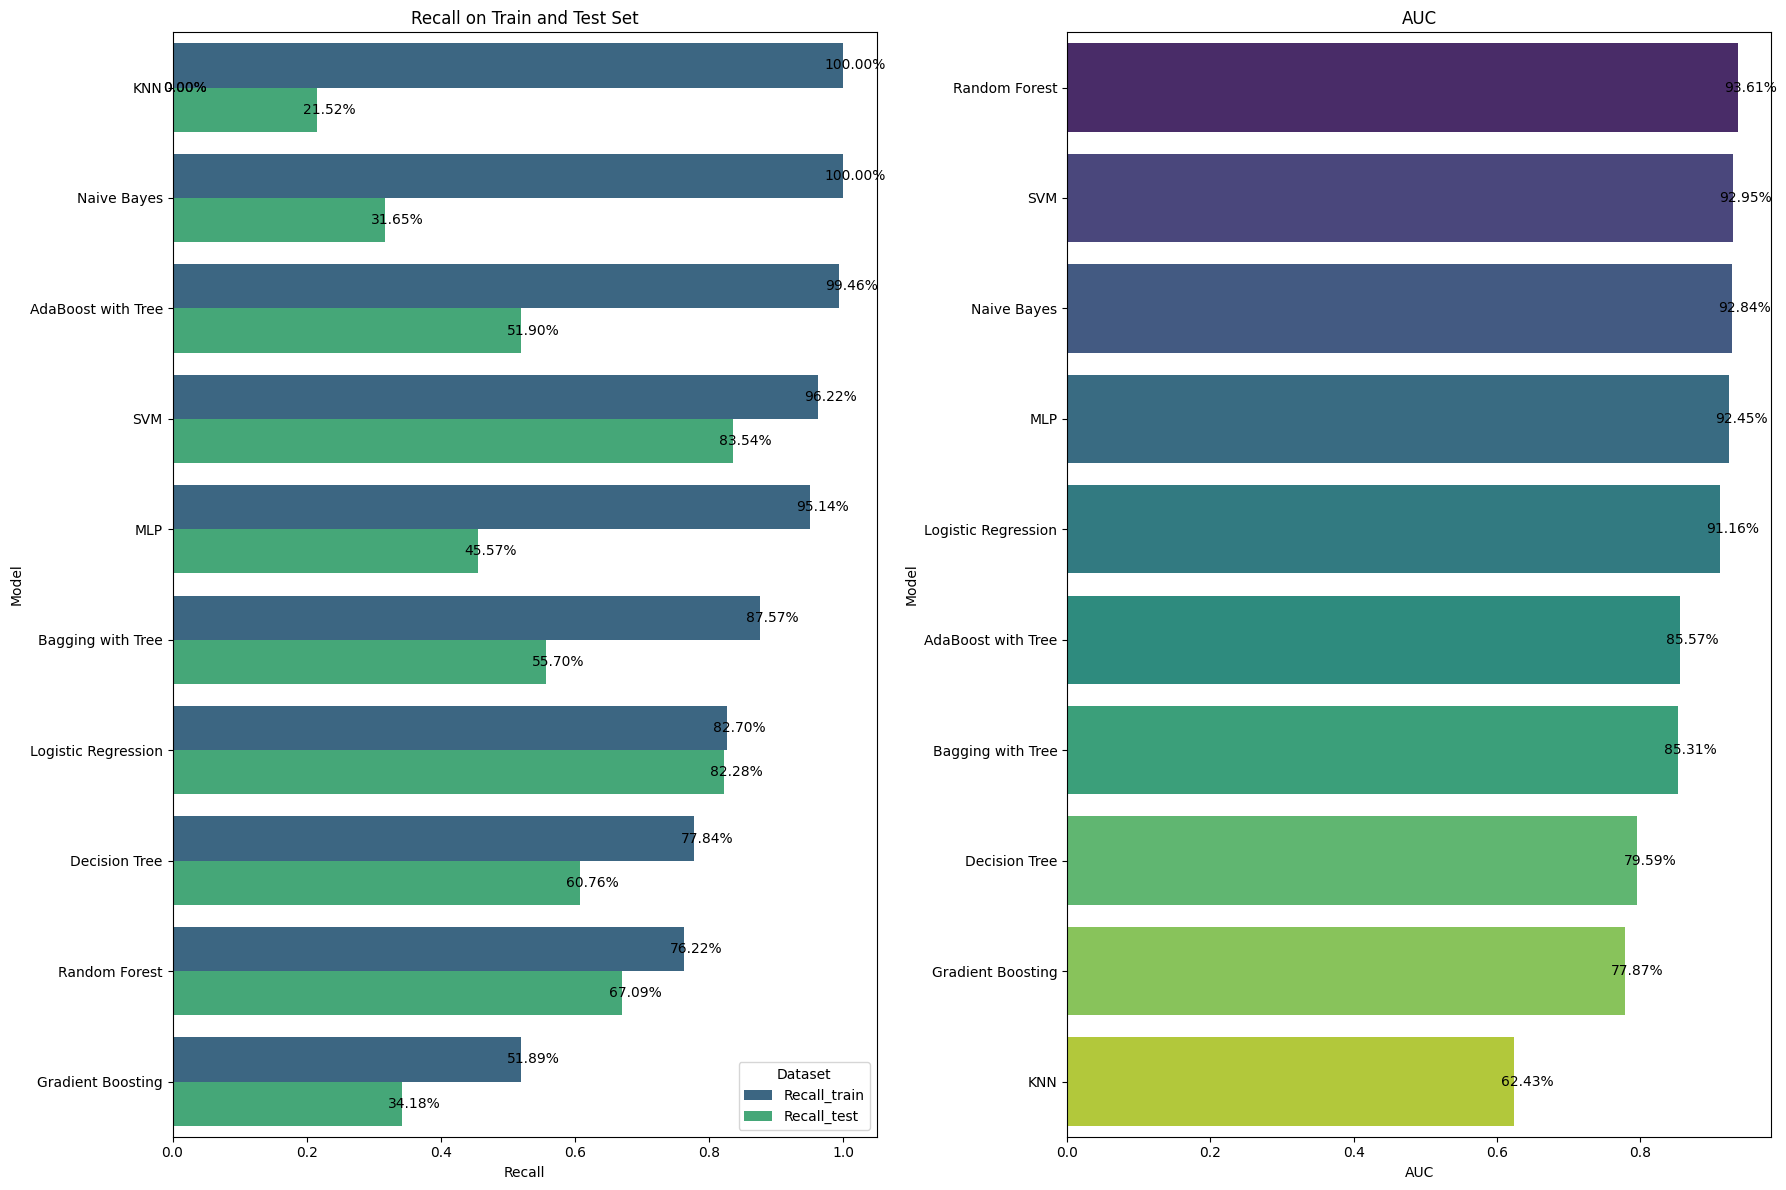

In [103]:
# recall (train vs test) and AUC
df_recall = df_results.melt(id_vars=["Model"], value_vars=["Recall_train", "Recall_test"],
                            var_name="Dataset", value_name="Recall")

# Sort the df_recall by Recall in descending order
df_recall = df_recall.sort_values(by="Recall", ascending=False)

# Sort df_results by AUC in descending order
df_results = df_results.sort_values(by="AUC", ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(18, 12))

# Plot for Recall on train and test set
sns.barplot(ax=axes[0], y='Model', x='Recall', hue='Dataset', data=df_recall, palette='viridis', dodge=True, orient='h')
axes[0].set_title('Recall on Train and Test Set')
axes[0].set_yticklabels(axes[0].get_yticklabels(), rotation=0)
axes[0].legend().set_title('Dataset')
for p in axes[0].patches:
    width = p.get_width()
    axes[0].annotate(f'{width:.2%}', (width, p.get_y() + p.get_height() / 2.),
                     ha='center', va='center', xytext=(9, 0), textcoords='offset points')

# Plot for AUC
sns.barplot(ax=axes[1], y='Model', x='AUC', data=df_results, palette='viridis', hue='Model', dodge=False, orient='h')
axes[1].set_title('AUC')
axes[1].set_yticklabels(axes[1].get_yticklabels(), rotation=0)
axes[1].legend().set_visible(False)
for p in axes[1].patches:
    width = p.get_width()
    axes[1].annotate(f'{width:.2%}', (width, p.get_y() + p.get_height() / 2.),
                     ha='center', va='center', xytext=(9, 0), textcoords='offset points')

plt.tight_layout()
plt.show()


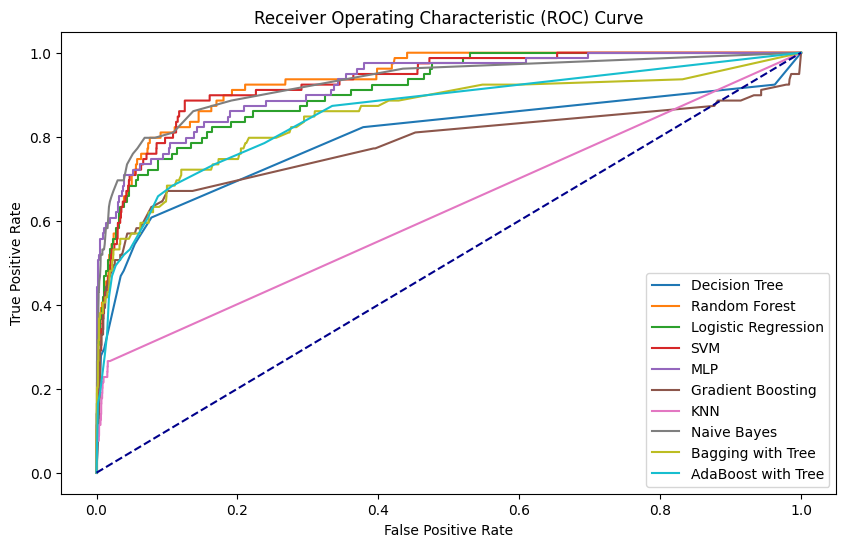

In [104]:
# Plotting ROC curves in one graph
plt.figure(figsize=(10, 6))
plt.plot(fpr_tree, tpr_tree, label='Decision Tree')
plt.plot(fpr_RandFor, tpr_RandFor, label='Random Forest')
plt.plot(fpr_LR, tpr_LR, label='Logistic Regression')
plt.plot(fpr_SVM, tpr_SVM, label='SVM')
plt.plot(fpr_MLP, tpr_MLP, label='MLP')
plt.plot(fpr_GB, tpr_GB, label='Gradient Boosting')
plt.plot(fpr_KNN, tpr_KNN, label='KNN')
plt.plot(fpr_NB, tpr_NB, label='Naive Bayes')
plt.plot(fpr_Bagtree, tpr_Bagtree, label='Bagging with Tree')
plt.plot(fpr_Adatree, tpr_Adatree, label='AdaBoost with Tree')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()



## Best model results

SVM and Logistic regression are the best models in term of both the AUC and the recall metric. Since Logistic regression is more interpretable as a model compared to SVM and is overfittig less, we've decided to adopt it as our final model.

In [105]:
best_param_LR

{'C': 0.1,
 'class_weight': {0: 0.5132161737391056, 1: 19.416216216216217},
 'max_iter': 600}

In [106]:
# recall and AUC of the final model
print('Recall test: ', recall_test_LR)
print('AUC: ', auc_LR)

Recall test:  0.8227848101265823
AUC:  0.9115737792044002


In [107]:
coefficients = best_model_LR.coef_[0]
intercept = best_model_LR.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [ 5.19399874e-02  1.40798683e+00 -1.73775417e+00 -4.04334845e-01
  3.74712942e-01 -1.65231008e-01  3.43071057e-01  2.12825425e-01
 -2.88963710e-01 -7.96022226e-01  4.04483851e-01 -4.71524359e-01
 -7.45493708e-01  6.64601901e-01 -1.09821375e-03  3.78983919e-01
  9.00522064e-01  4.18667971e-01 -1.23013287e-01  4.01645368e-01
 -4.93507970e-01 -3.00792111e+00  5.46700731e-01  5.46878797e-02
 -3.26105721e-01]
Intercept: [-1.60337116]


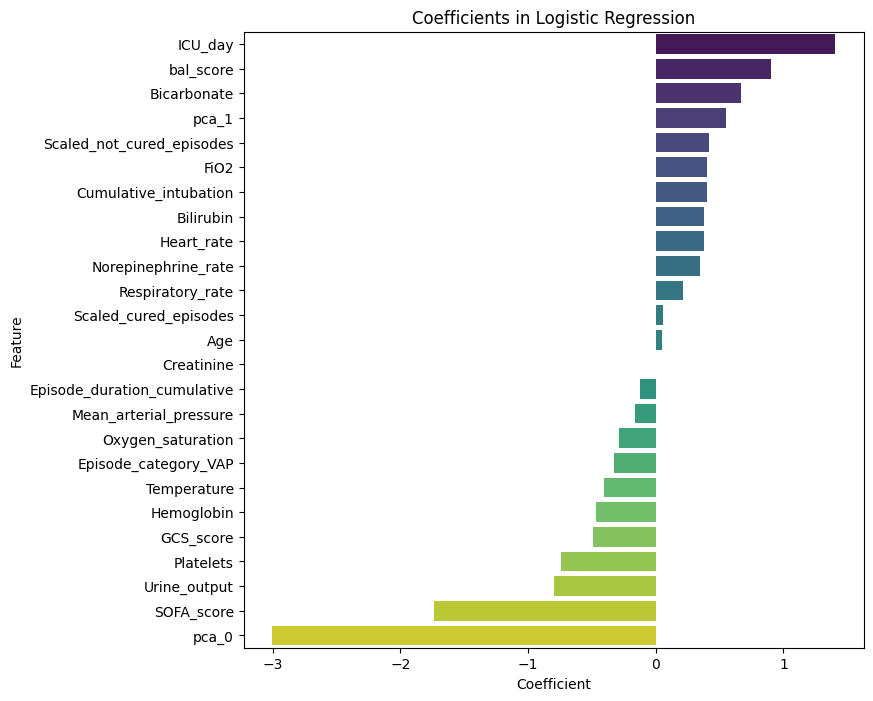

In [108]:
feature_names = selected_feature_names_rf
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

coef_df_sorted = coef_df.sort_values(by='Coefficient', ascending=False)


fig, ax = plt.subplots(figsize=(8,8))
sns.barplot(x='Coefficient', y='Feature', data=coef_df_sorted, palette='viridis')

plt.title('Coefficients in Logistic Regression')
plt.show()

Let's take a final look to the ROC curve and the conusion matrix of our final model

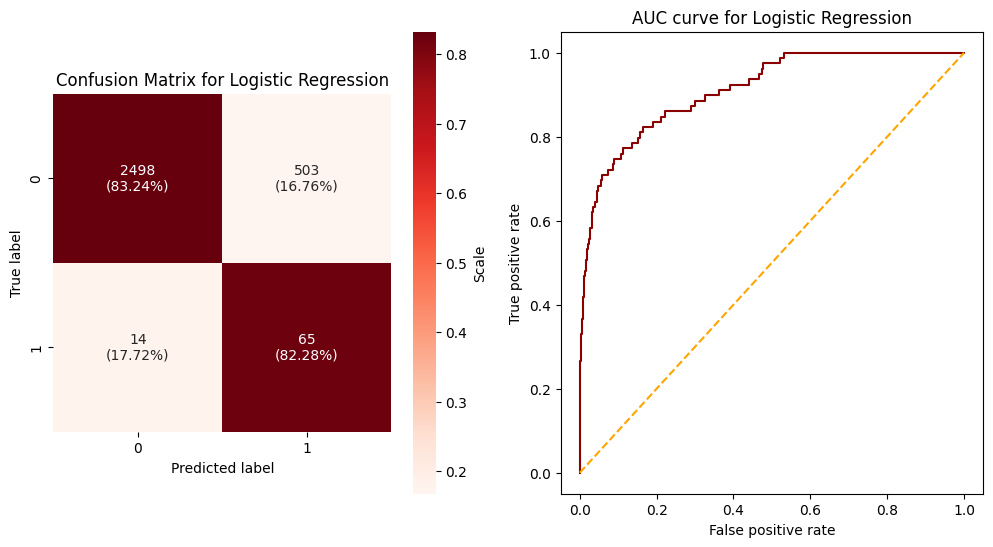

In [109]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))


cm = confusion_matrix(y_test_LR, y_pred_LR)
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
annot = np.empty_like(cm).astype(str)
nrows, ncols = cm.shape
for i in range(nrows):
    for j in range(ncols):
        c = cm[i, j]
        p = cm_norm[i, j] * 100
        s = f"{c}\n({p:.2f}%)"
        annot[i, j] = s
sns.heatmap(cm_norm, annot=annot, fmt='', cmap='Reds', cbar_kws={'label': 'Scale'}, ax=axs[0], square=True)
axs[0].set_title(f'Confusion Matrix for Logistic Regression')
axs[0].set_xlabel('Predicted label')
axs[0].set_ylabel('True label')

axs[1].plot(fpr_LR, tpr_LR, color = 'darkred')
axs[1].set_title('AUC curve for Logistic Regression')
axs[1].set_xlabel('False positive rate')
axs[1].set_ylabel('True positive rate')
axs[1].plot([0, 1], [0, 1], color='orange', linestyle='--')